# Exploratory Data Analysis of our data

### Inferences
* Categorical columns have high and low null values - fill 'None'
  * Because NULL there means 'None'
  * Example - PoolQC NULL means there is no Pool, Alley NULL means no access to Alley

* Numerical data is divided in two parts - discrete (limited num values) and continous (not as discrete)
  * Example of numerical discrete is number_of_baths and numerical continous is SalePrice itself
* Better to fill null values of numerical-discrete columns with MODE if missing
* Better to fill null values of numerical-continous columns with MEDIAN as the data is skewed

* Target column (SalePrice) is right skewed. Thus any null values should be imputed with MEDIAN.
* Not dropping outliers right now because the dataset is small.

* Tree algorithms can handle imbalanced classes effectively.

* Numerical continous columns can be standard scaled

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv('../../extracts/raw/train.csv').set_index('Id')
data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                             
1        0      2    2008        WD         Normal     208500  
2        0      5    2007        WD         Normal     181500  
3        0      9    2008        WD         Normal     223500  
4        0      2    2006        WD        Abnorml     140000  
5        0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

# Handling High Null Values

In [3]:
# Null values
data.isna().sum()[data.isna().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [4]:
print(f"Length of the dataset : {len(data)}\n")
print("Null values accourding to %....")
nulls = {}
for column in data.columns:
    print('*'*50)
    print(f"{column} column -----> {(data[column].isna().sum()/len(data))*100:.2f} % null values.\n")
    nulls[column] = (data[column].isna().sum()/len(data))*100

Length of the dataset : 1460

Null values accourding to %....
**************************************************
MSSubClass column -----> 0.00 % null values.

**************************************************
MSZoning column -----> 0.00 % null values.

**************************************************
LotFrontage column -----> 17.74 % null values.

**************************************************
LotArea column -----> 0.00 % null values.

**************************************************
Street column -----> 0.00 % null values.

**************************************************
Alley column -----> 93.77 % null values.

**************************************************
LotShape column -----> 0.00 % null values.

**************************************************
LandContour column -----> 0.00 % null values.

**************************************************
Utilities column -----> 0.00 % null values.

**************************************************
LotConfig column -----> 0.0

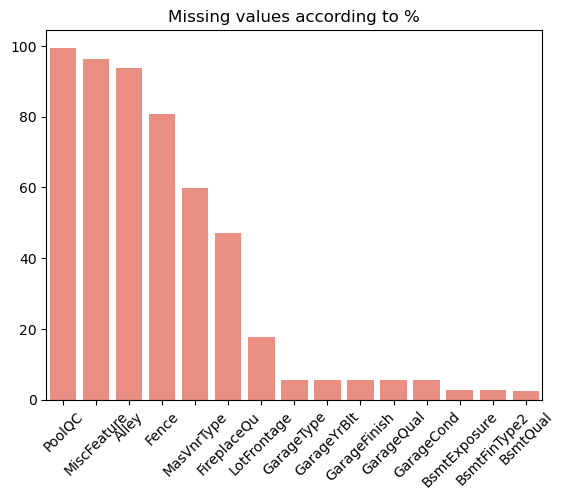

In [5]:
nulls = dict(sorted(nulls.items(), key=lambda item : item[1], reverse=True))
sns.barplot(dict(list(nulls.items())[:15]), color='salmon')
plt.title('Missing values according to %')
plt.xticks(rotation=45);

In [6]:
nulls

{'PoolQC': 99.52054794520548,
 'MiscFeature': 96.30136986301369,
 'Alley': 93.76712328767123,
 'Fence': 80.75342465753424,
 'MasVnrType': 59.726027397260275,
 'FireplaceQu': 47.26027397260274,
 'LotFrontage': 17.73972602739726,
 'GarageType': 5.5479452054794525,
 'GarageYrBlt': 5.5479452054794525,
 'GarageFinish': 5.5479452054794525,
 'GarageQual': 5.5479452054794525,
 'GarageCond': 5.5479452054794525,
 'BsmtExposure': 2.6027397260273974,
 'BsmtFinType2': 2.6027397260273974,
 'BsmtQual': 2.5342465753424657,
 'BsmtCond': 2.5342465753424657,
 'BsmtFinType1': 2.5342465753424657,
 'MasVnrArea': 0.547945205479452,
 'Electrical': 0.0684931506849315,
 'MSSubClass': 0.0,
 'MSZoning': 0.0,
 'LotArea': 0.0,
 'Street': 0.0,
 'LotShape': 0.0,
 'LandContour': 0.0,
 'Utilities': 0.0,
 'LotConfig': 0.0,
 'LandSlope': 0.0,
 'Neighborhood': 0.0,
 'Condition1': 0.0,
 'Condition2': 0.0,
 'BldgType': 0.0,
 'HouseStyle': 0.0,
 'OverallQual': 0.0,
 'OverallCond': 0.0,
 'YearBuilt': 0.0,
 'YearRemodAdd': 0.0

In [7]:
num_cols = data.select_dtypes(include=['number']).columns.to_list()
obj_cols = data.select_dtypes(include=['object']).columns.to_list()
print(f'Number of numeric columns: {len(num_cols)}, object columns: {len(obj_cols)}')

Number of numeric columns: 37, object columns: 43


In [8]:
for column in obj_cols:
    data[column].fillna('None', inplace=True)
    print(f"Filled null of {column} with 'None'")

Filled null of MSZoning with 'None'
Filled null of Street with 'None'
Filled null of Alley with 'None'
Filled null of LotShape with 'None'
Filled null of LandContour with 'None'
Filled null of Utilities with 'None'
Filled null of LotConfig with 'None'
Filled null of LandSlope with 'None'
Filled null of Neighborhood with 'None'
Filled null of Condition1 with 'None'
Filled null of Condition2 with 'None'
Filled null of BldgType with 'None'
Filled null of HouseStyle with 'None'
Filled null of RoofStyle with 'None'
Filled null of RoofMatl with 'None'
Filled null of Exterior1st with 'None'
Filled null of Exterior2nd with 'None'
Filled null of MasVnrType with 'None'
Filled null of ExterQual with 'None'
Filled null of ExterCond with 'None'
Filled null of Foundation with 'None'
Filled null of BsmtQual with 'None'
Filled null of BsmtCond with 'None'
Filled null of BsmtExposure with 'None'
Filled null of BsmtFinType1 with 'None'
Filled null of BsmtFinType2 with 'None'
Filled null of Heating with 

# Target Column - SalePrice

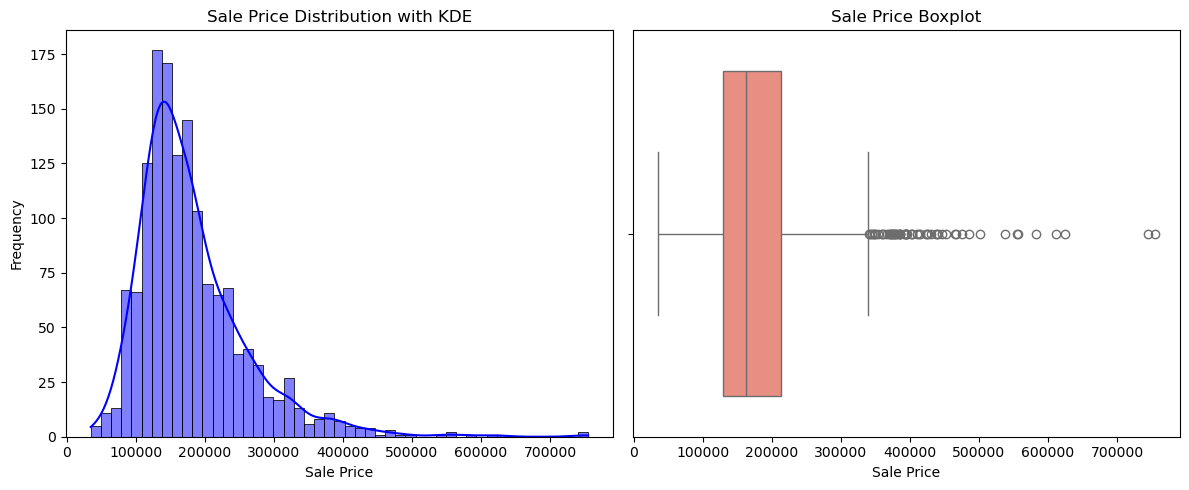

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram with KDE on the left
sns.histplot(data['SalePrice'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Sale Price Distribution with KDE')
axes[0].set_xlabel('Sale Price')
axes[0].set_ylabel('Frequency')

# Boxplot on the right
sns.boxplot(x=data['SalePrice'], ax=axes[1], color='salmon')
axes[1].set_title('Sale Price Boxplot')
axes[1].set_xlabel('Sale Price')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

# Categorical Columns

In [10]:
print(obj_cols)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


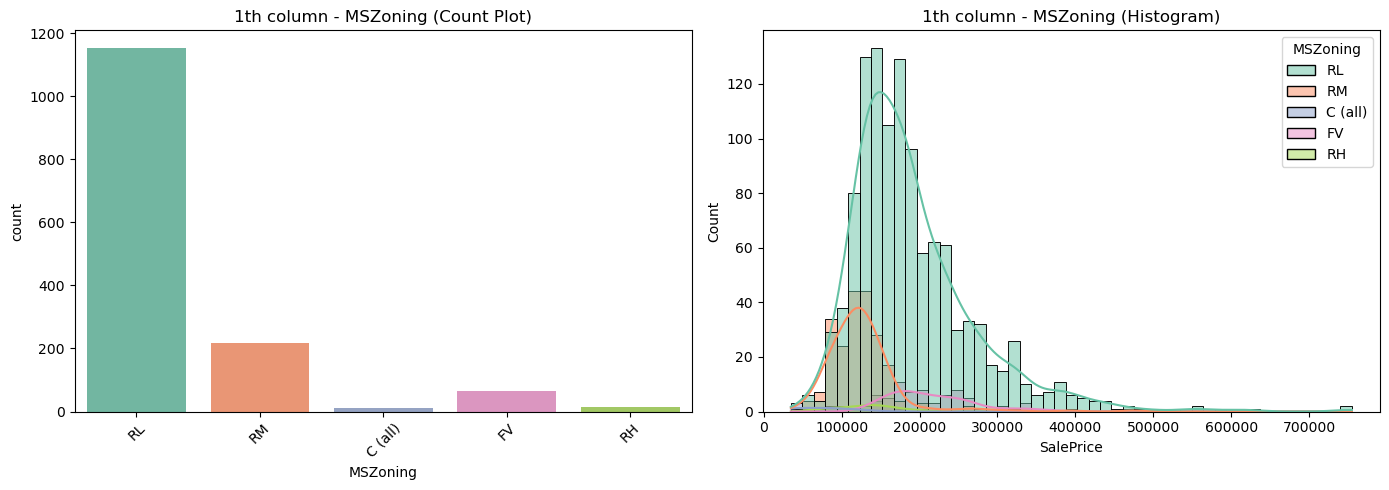

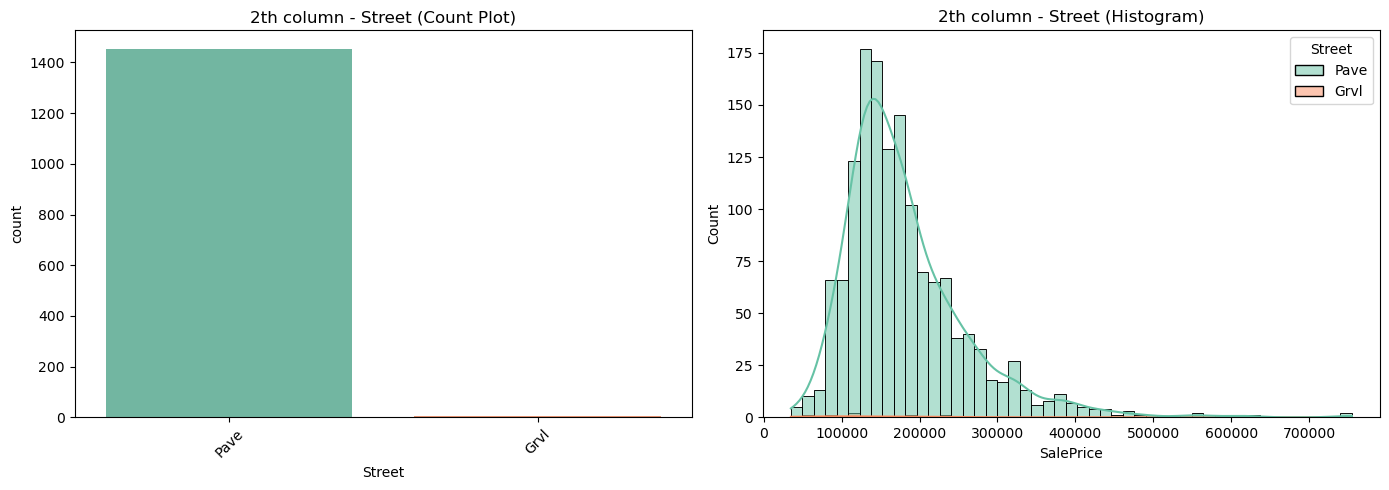

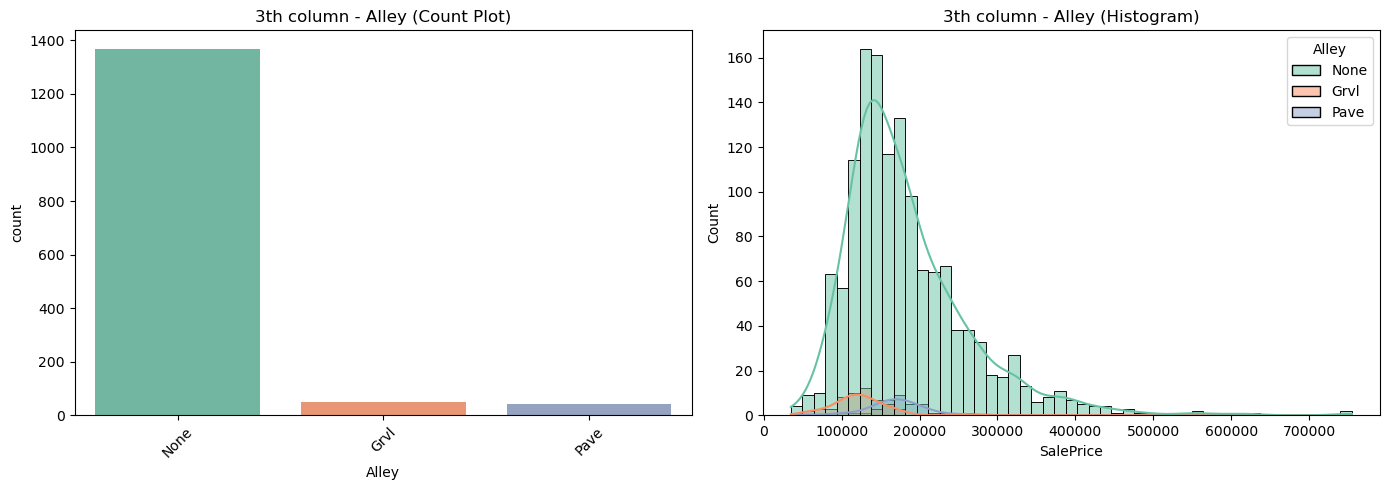

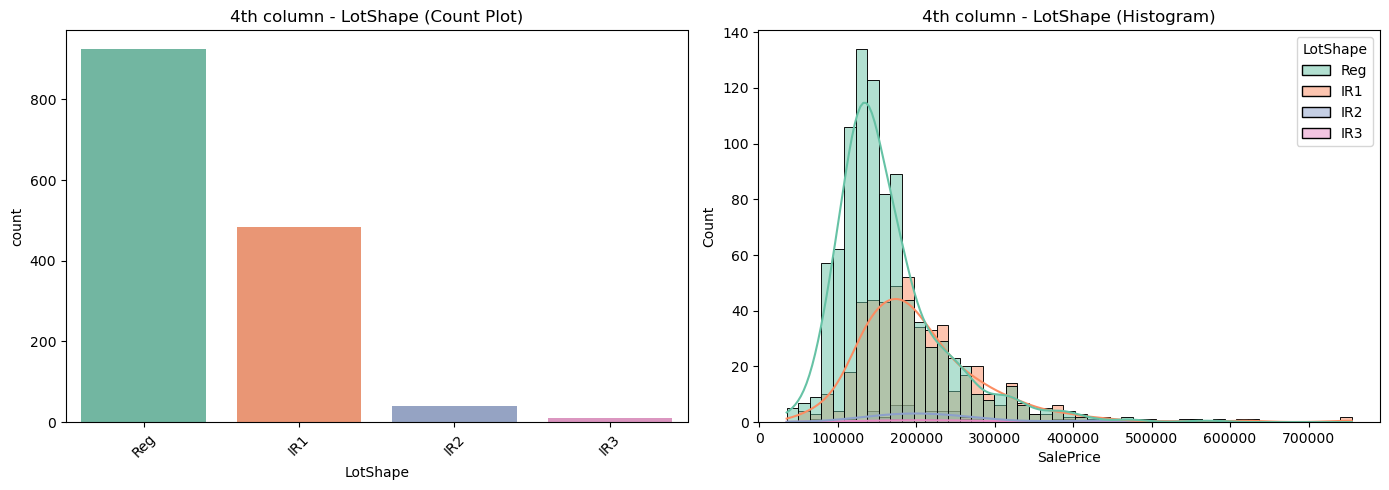

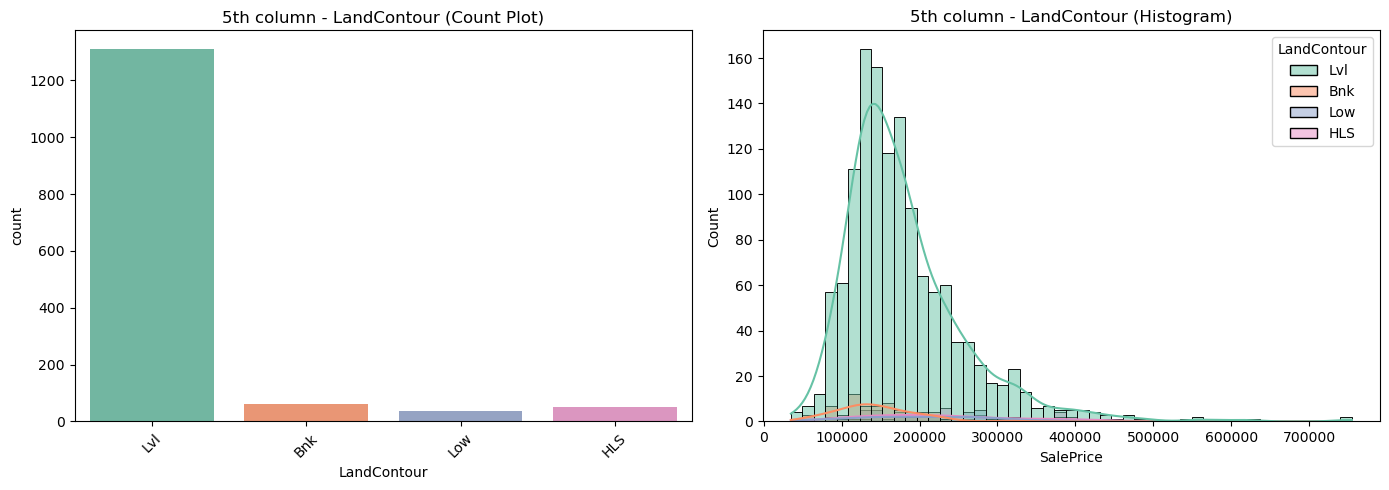

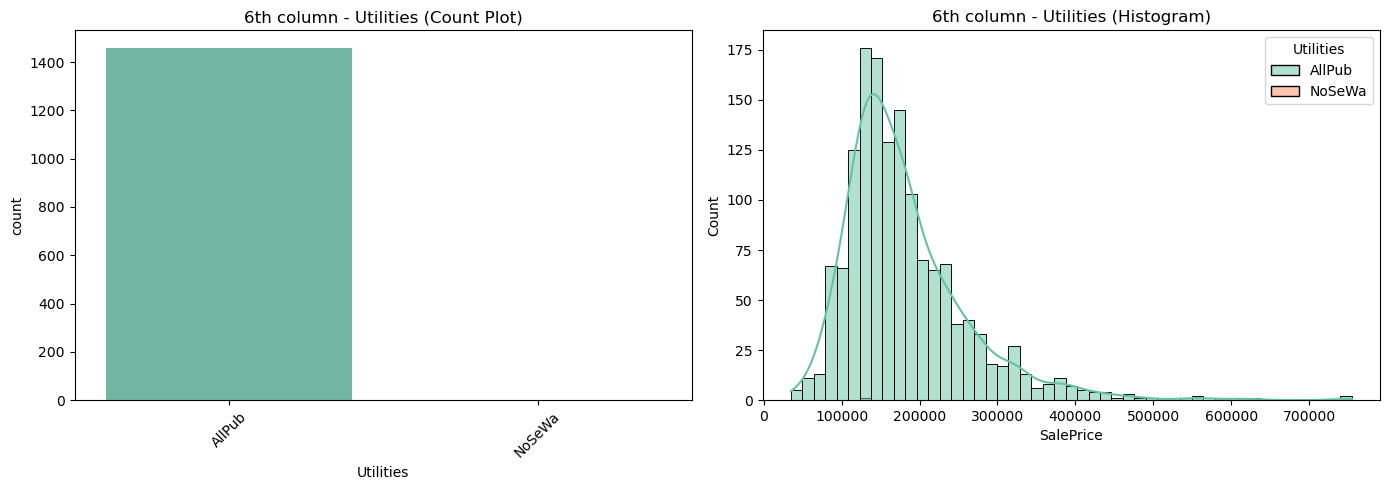

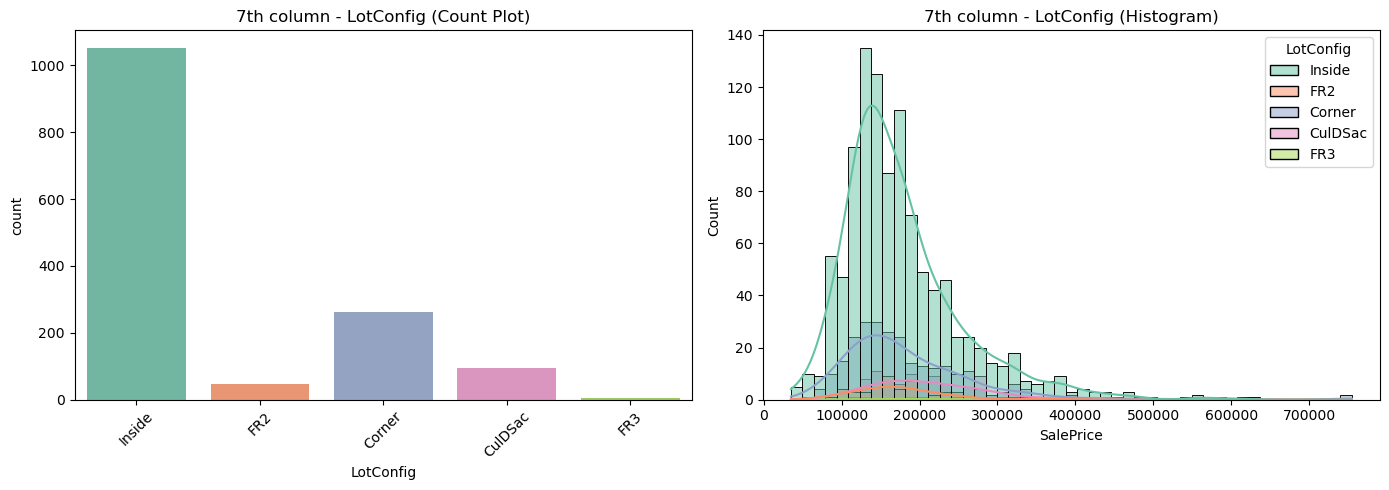

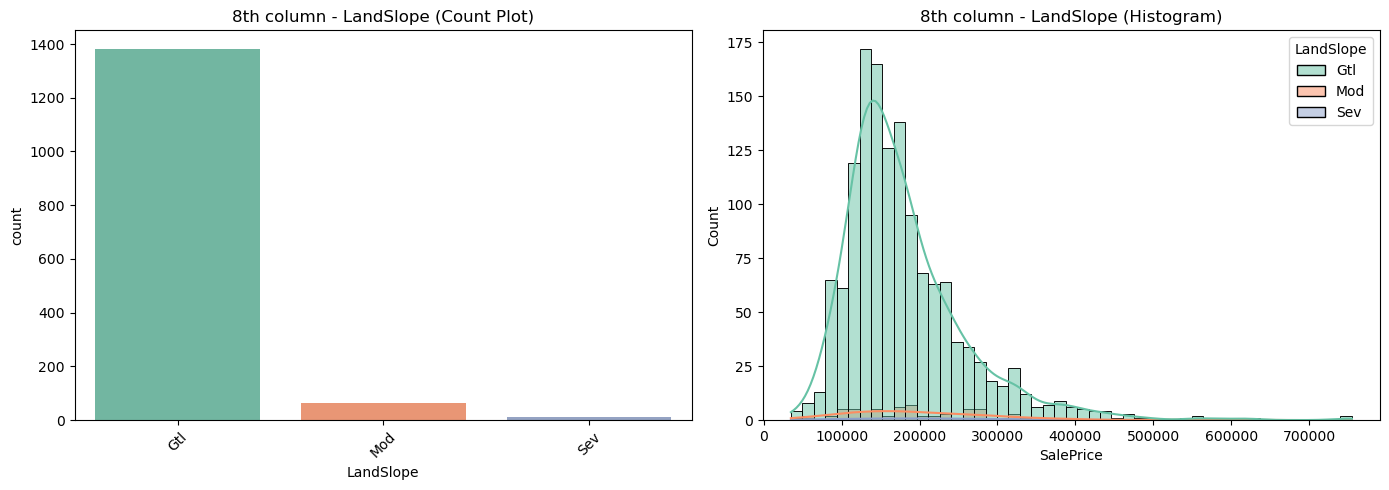

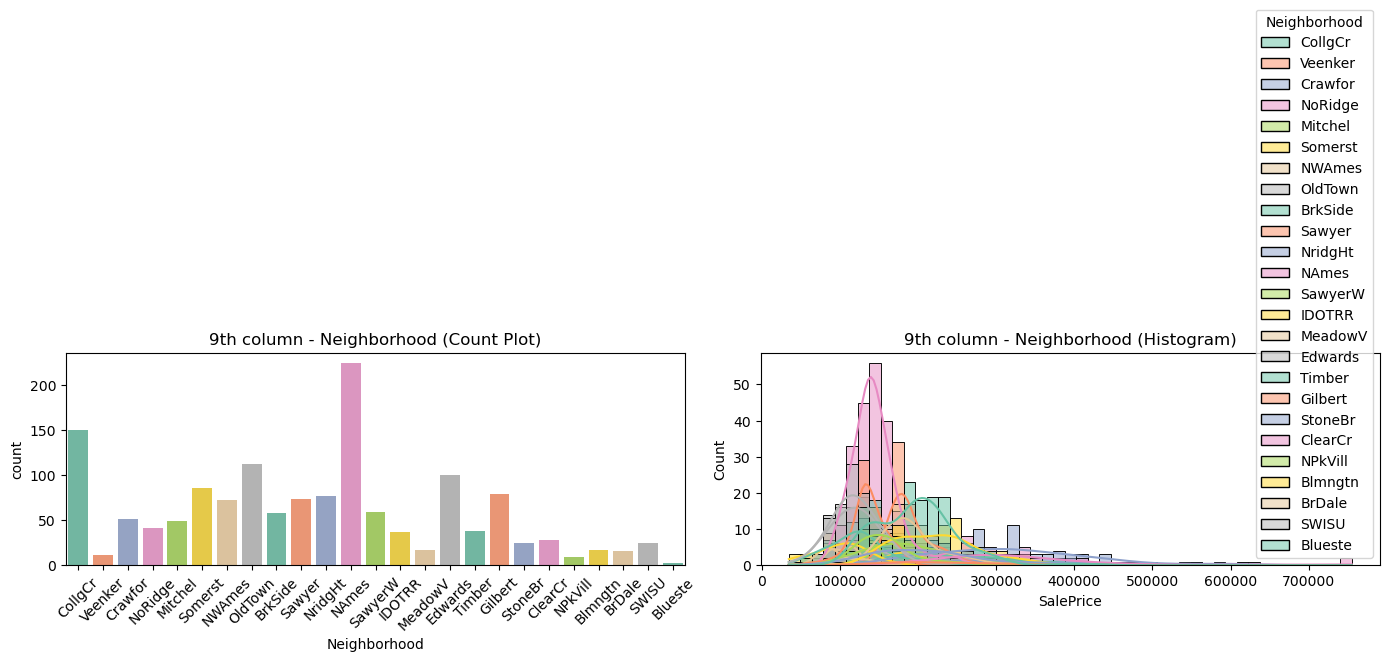

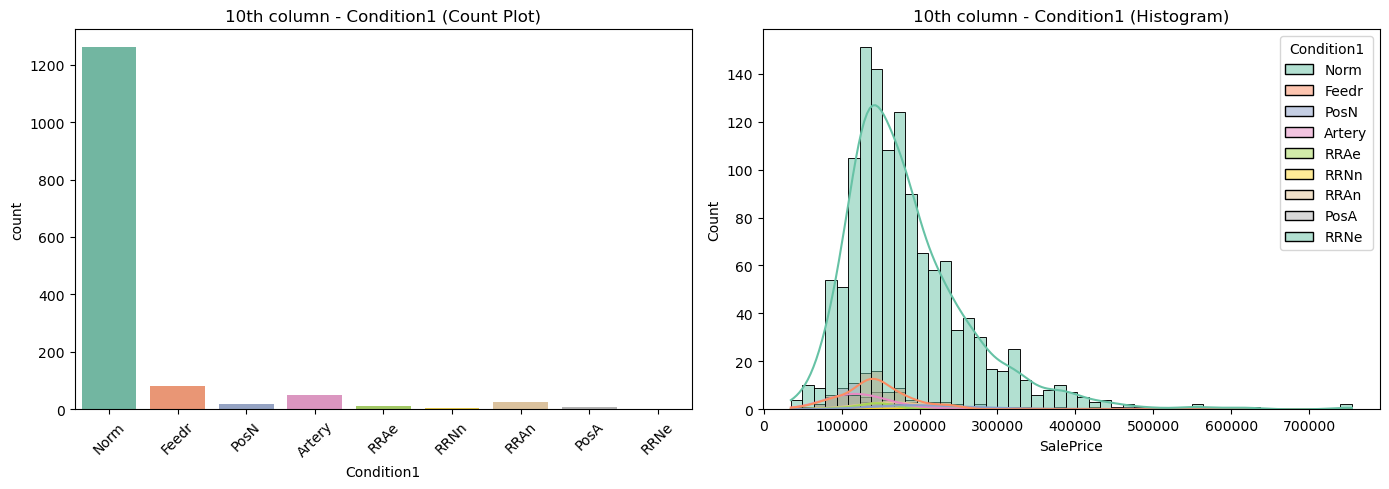

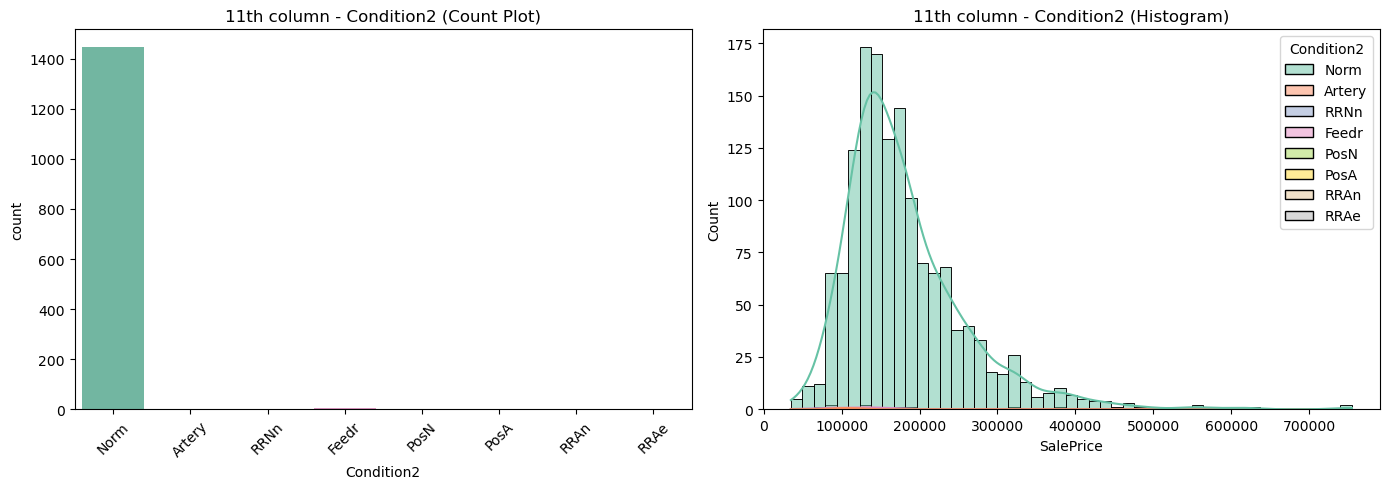

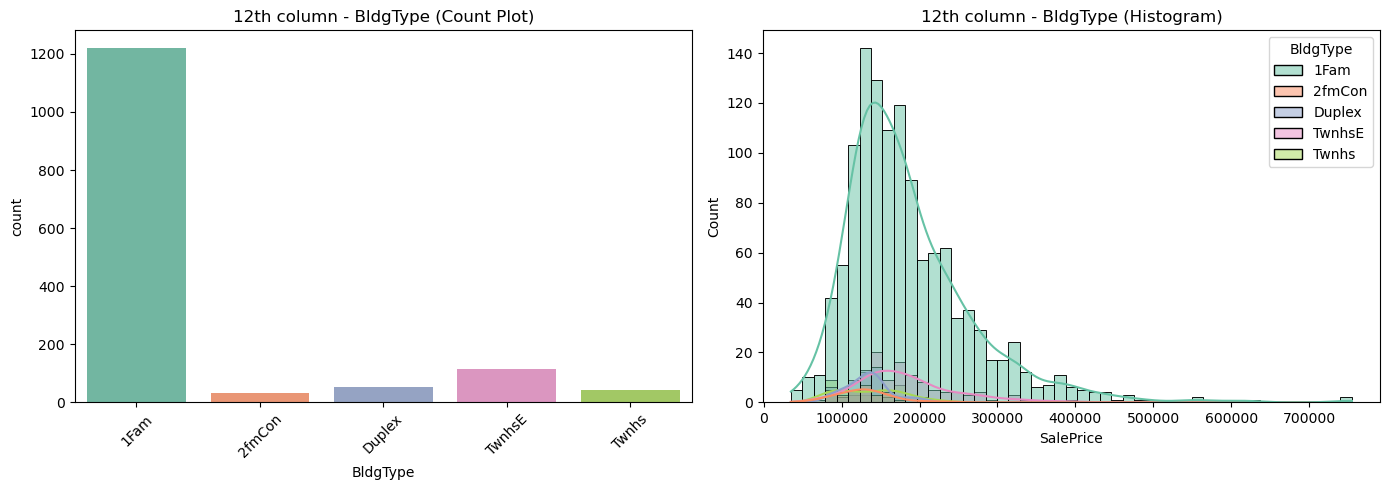

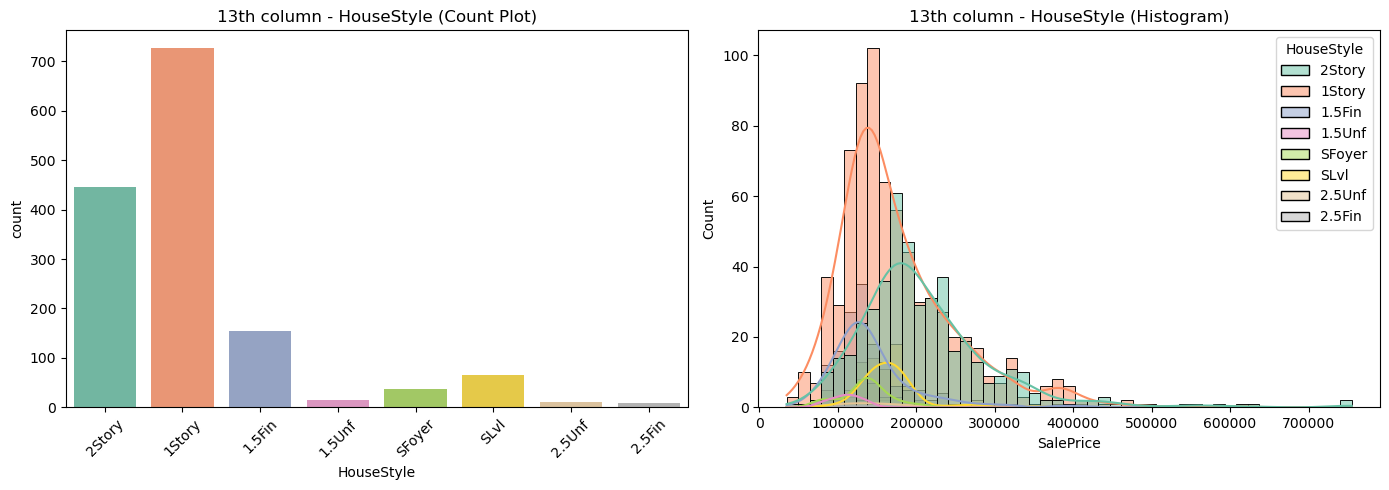

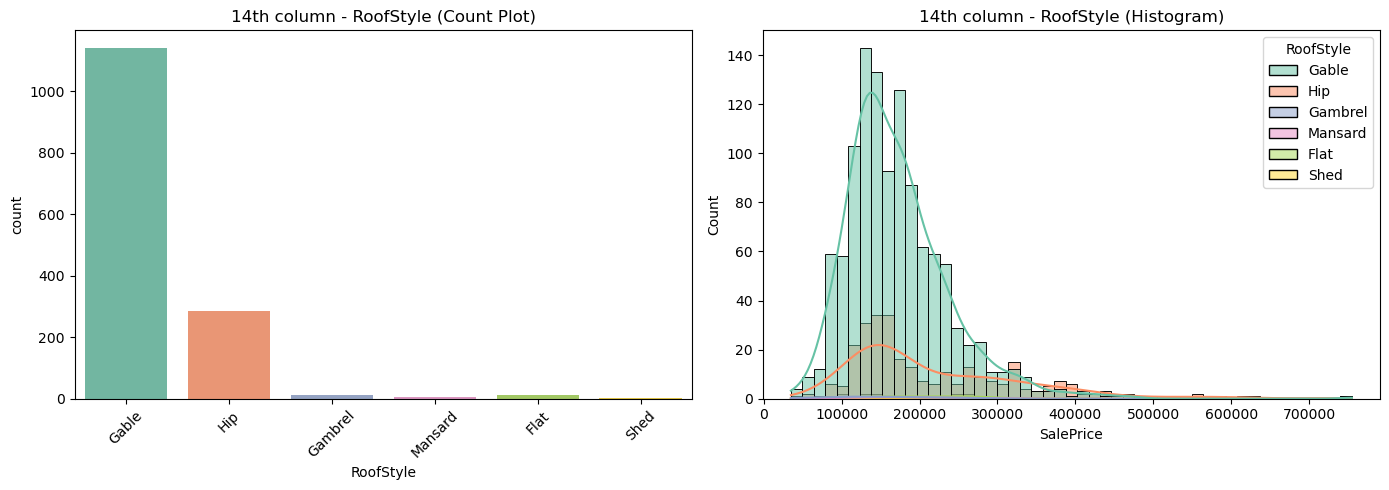

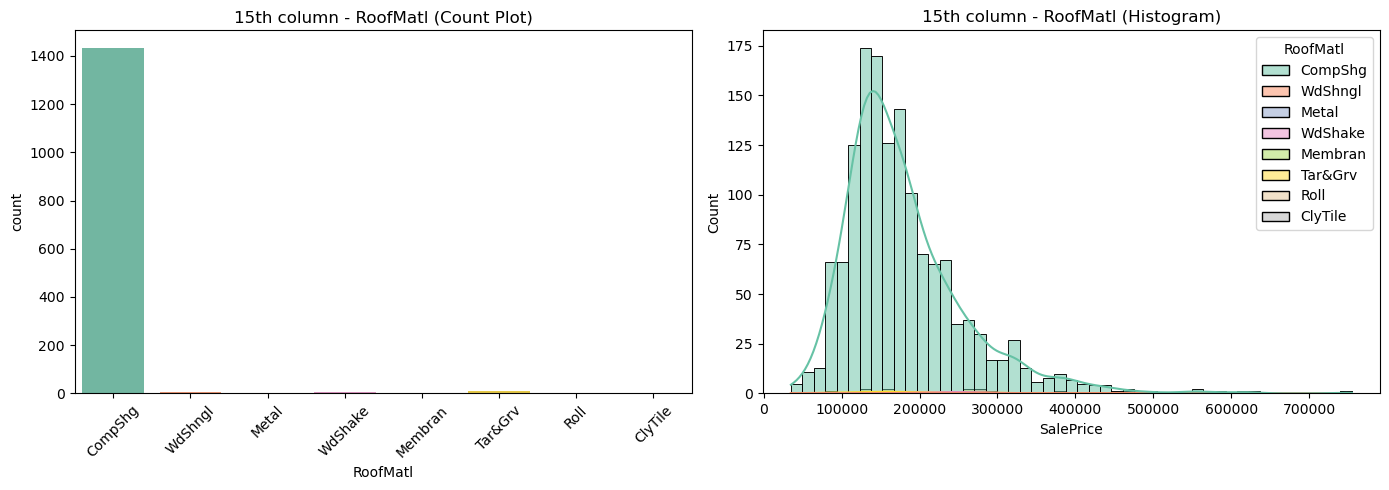

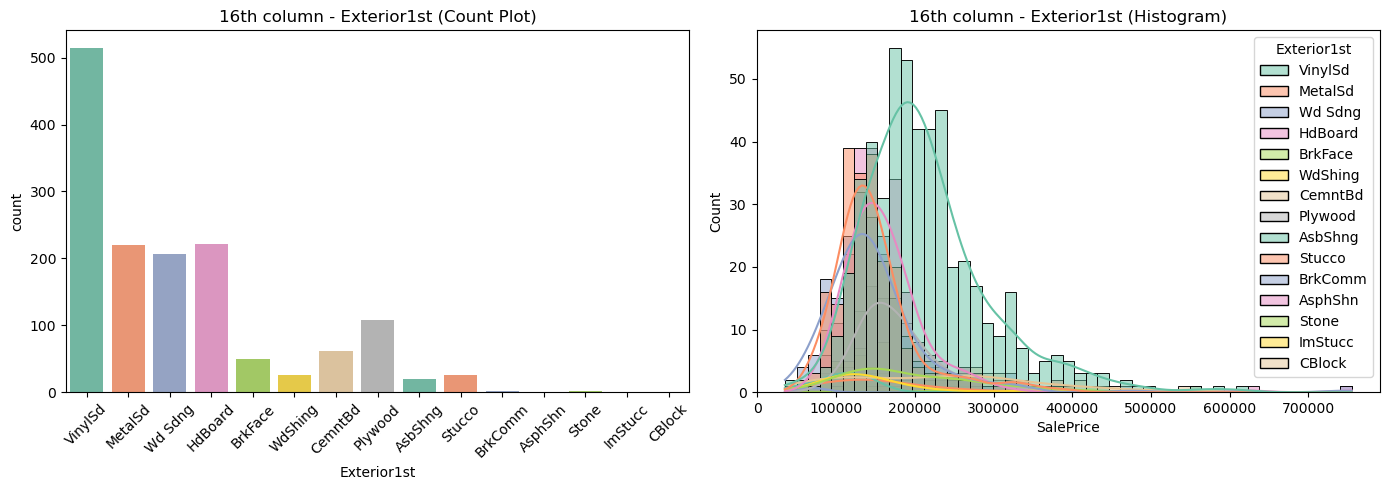

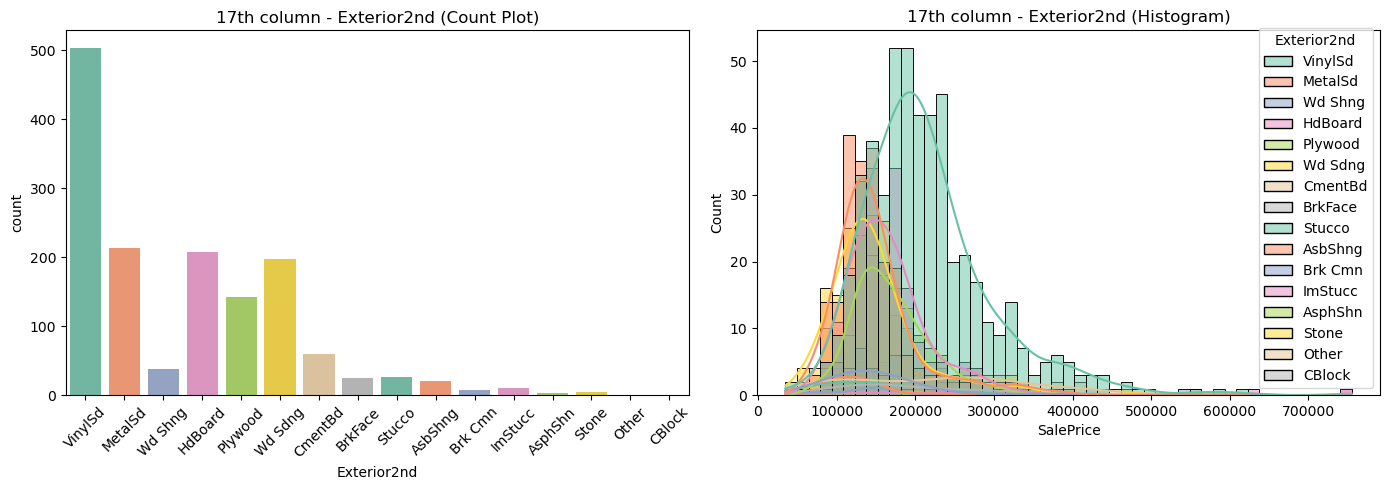

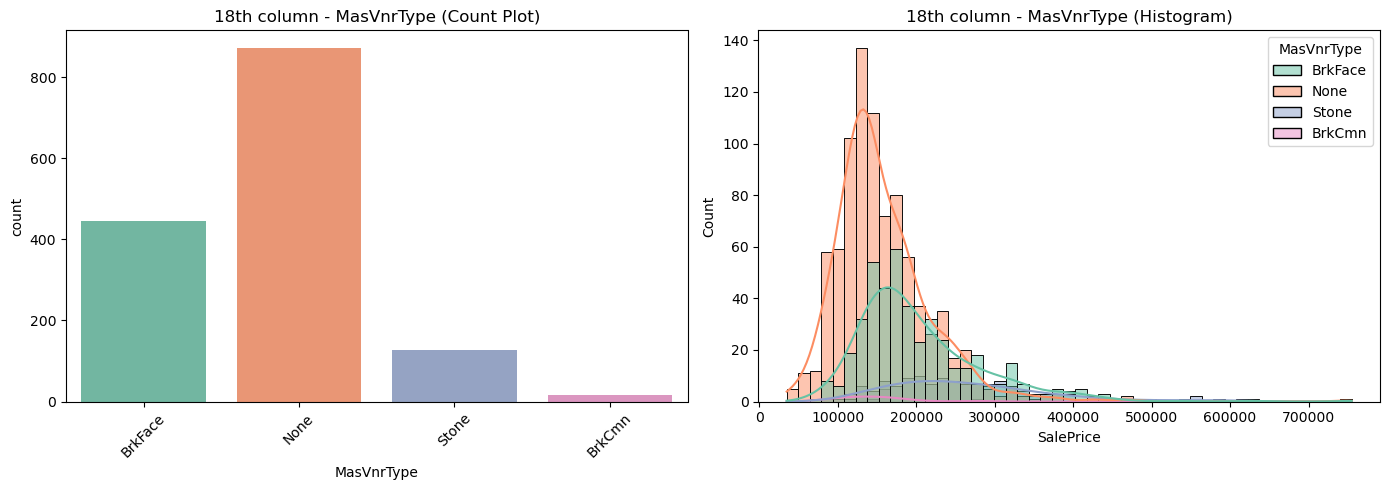

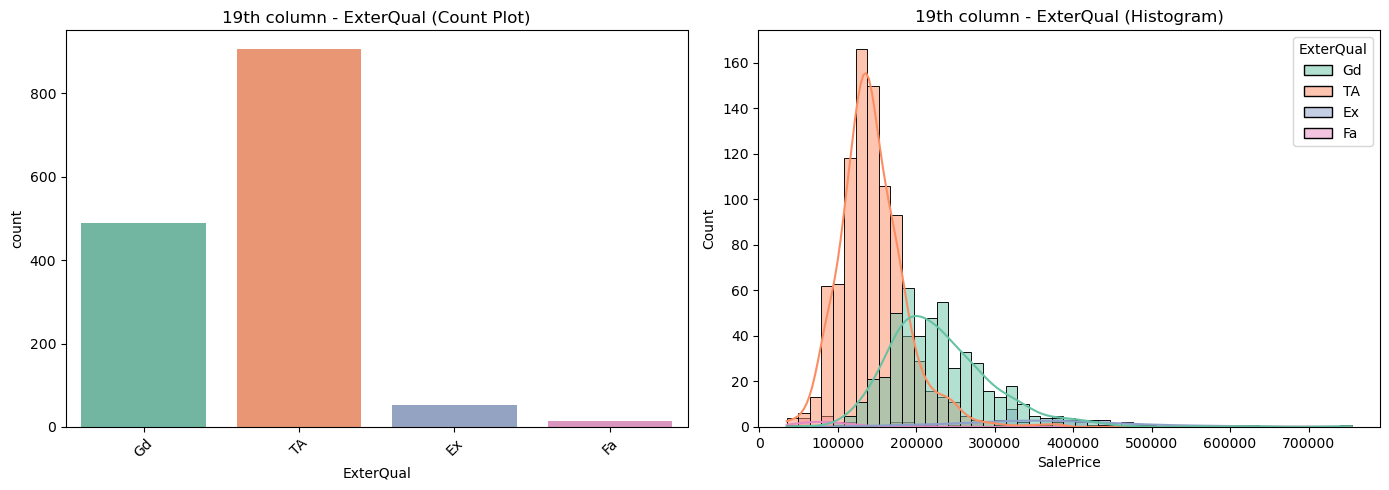

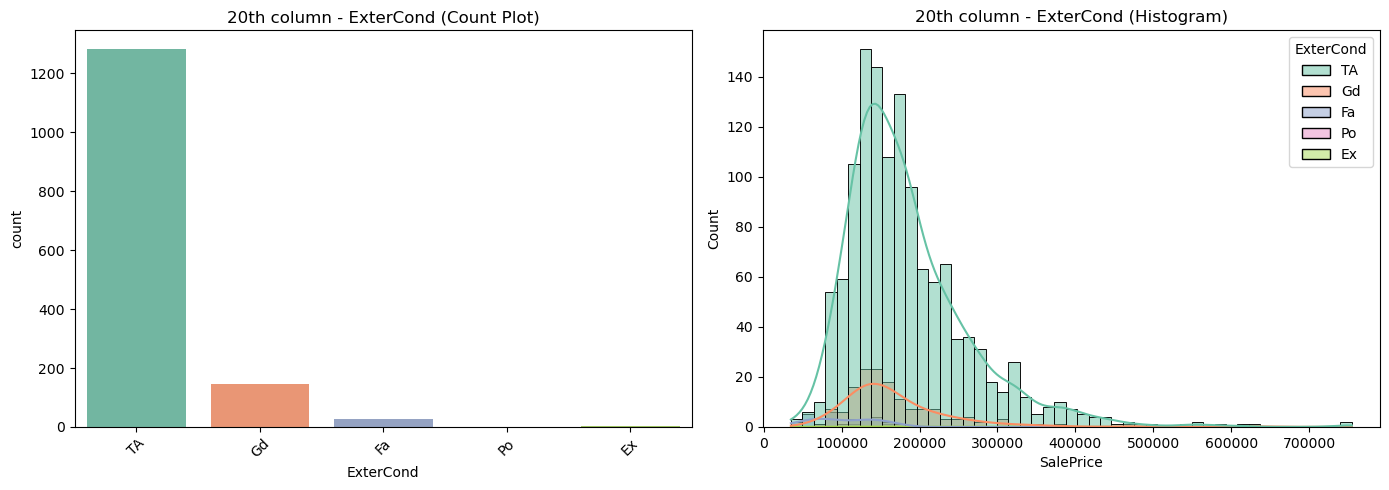

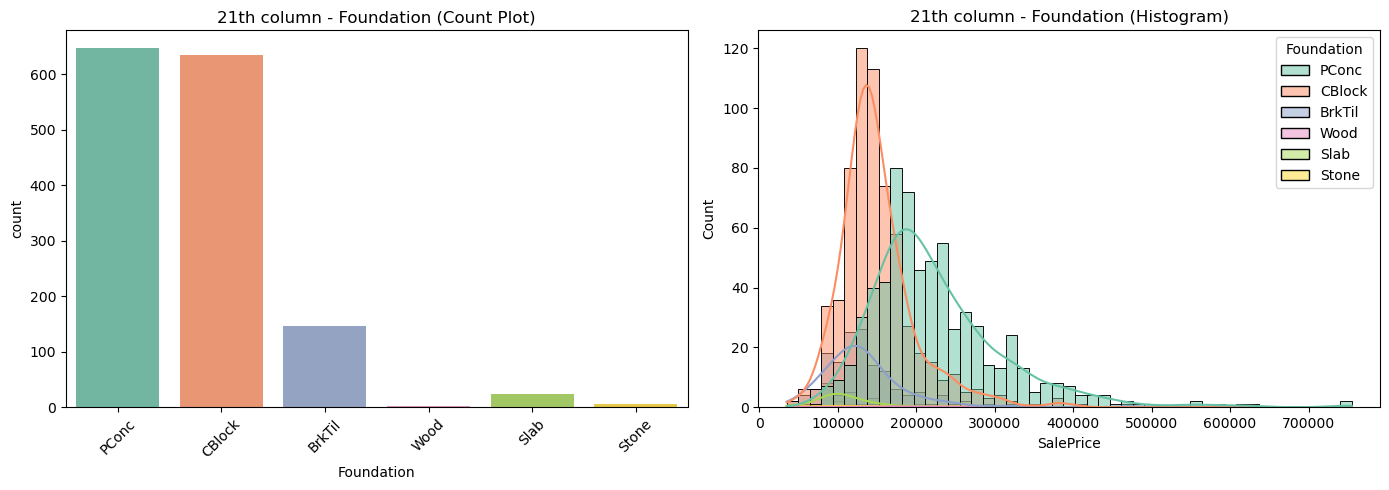

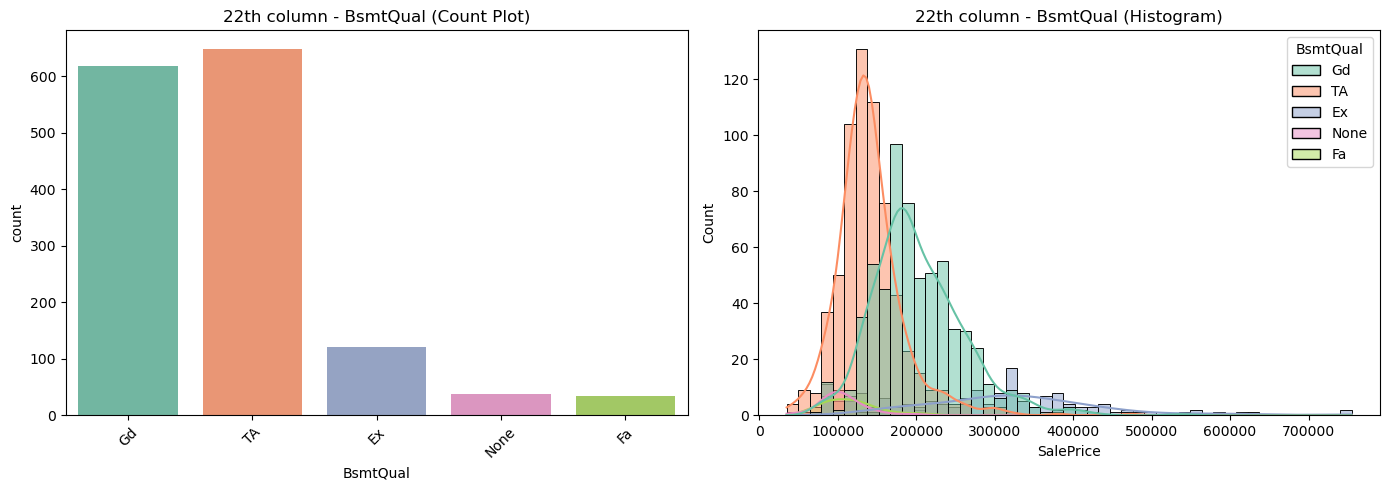

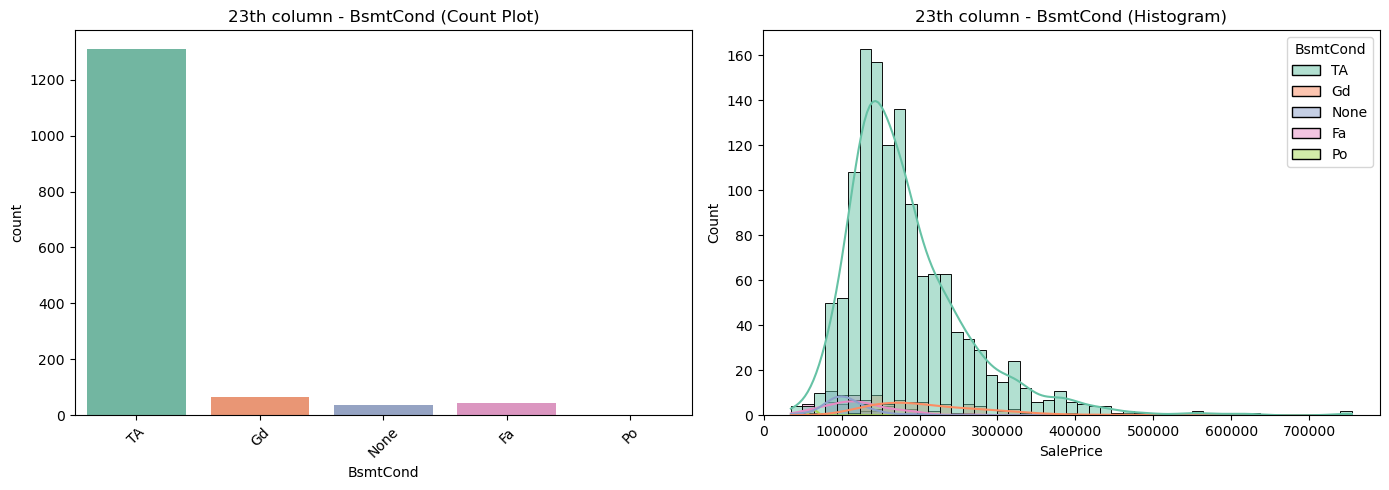

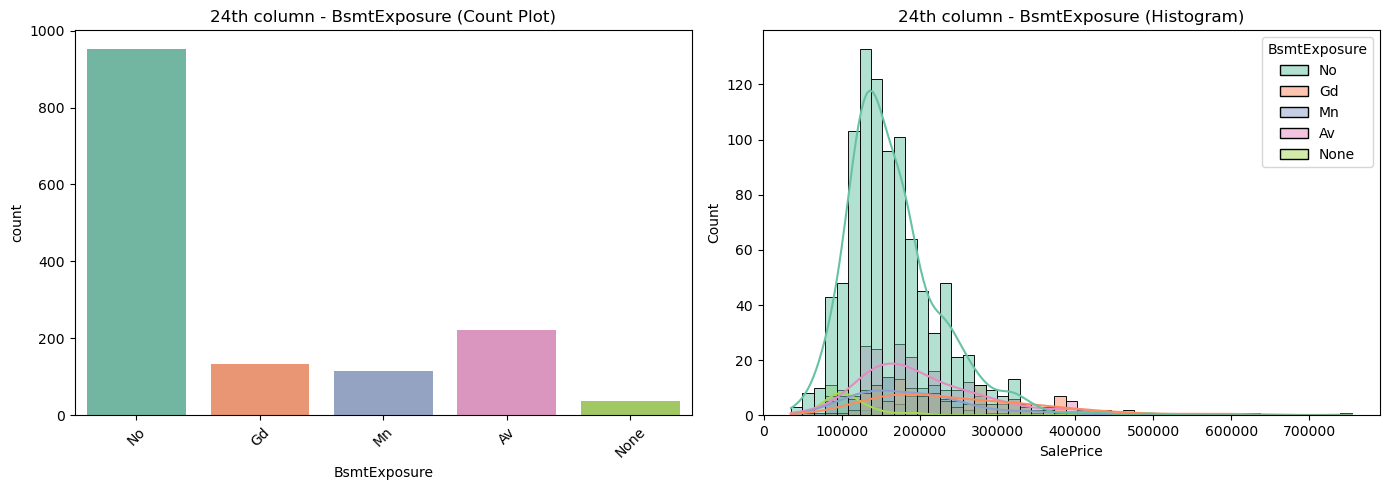

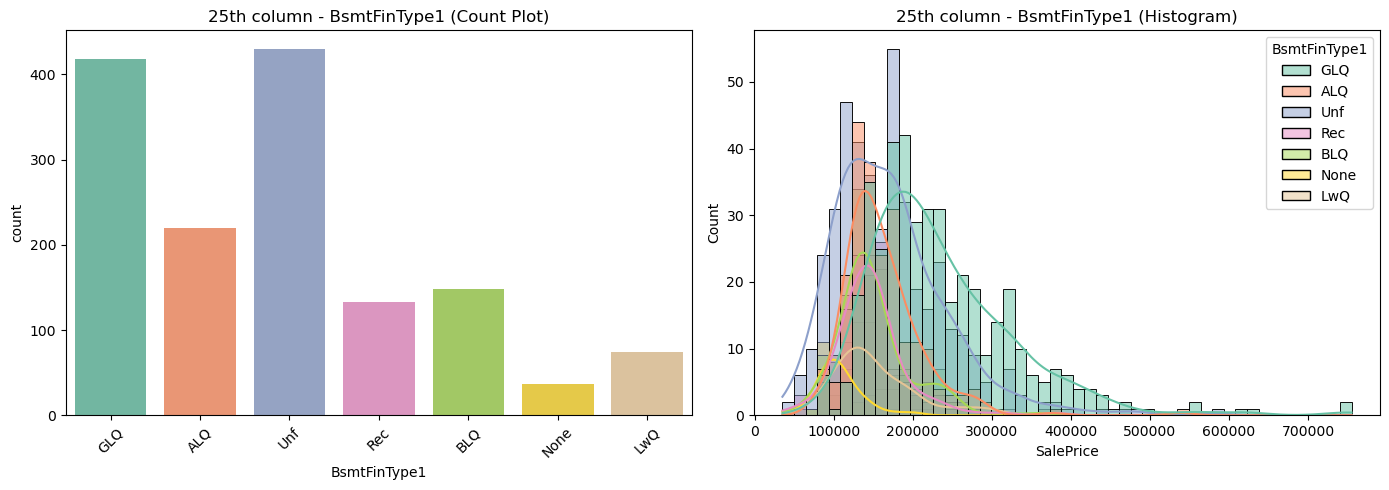

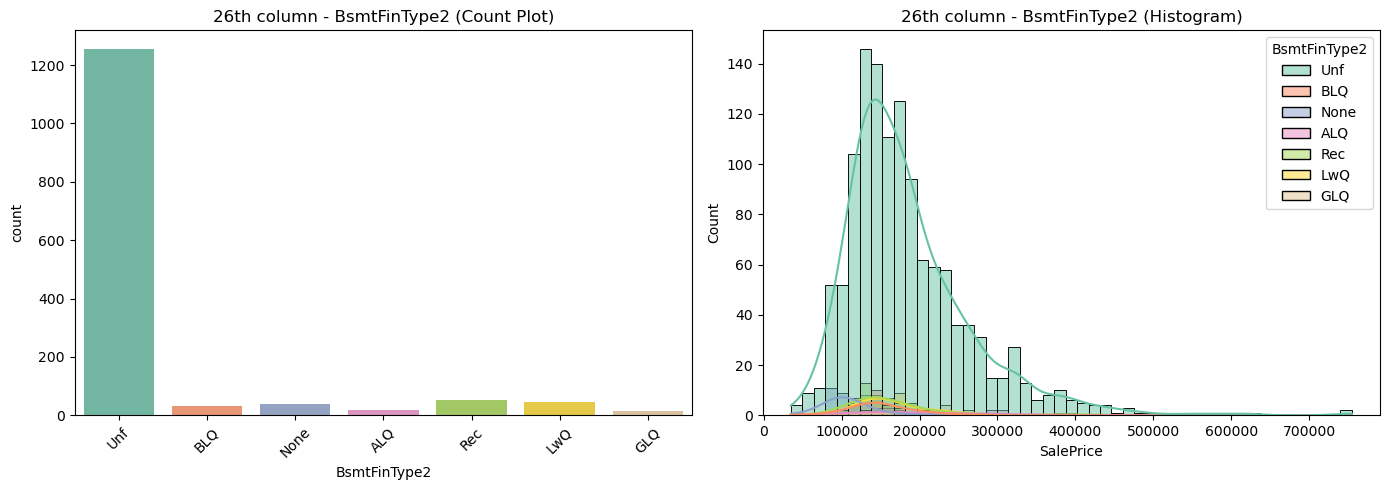

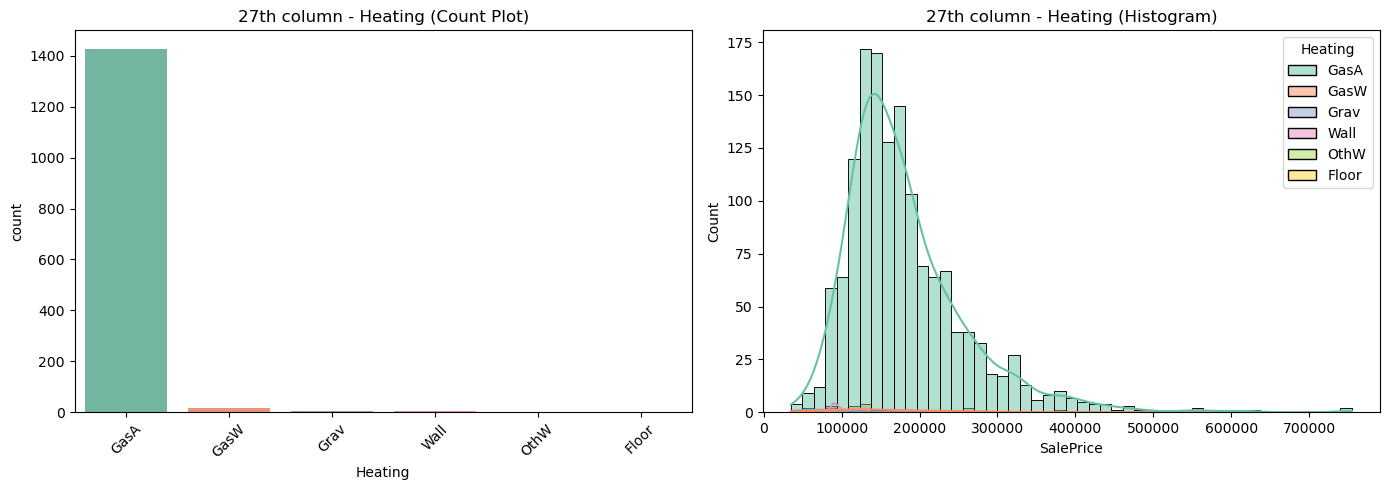

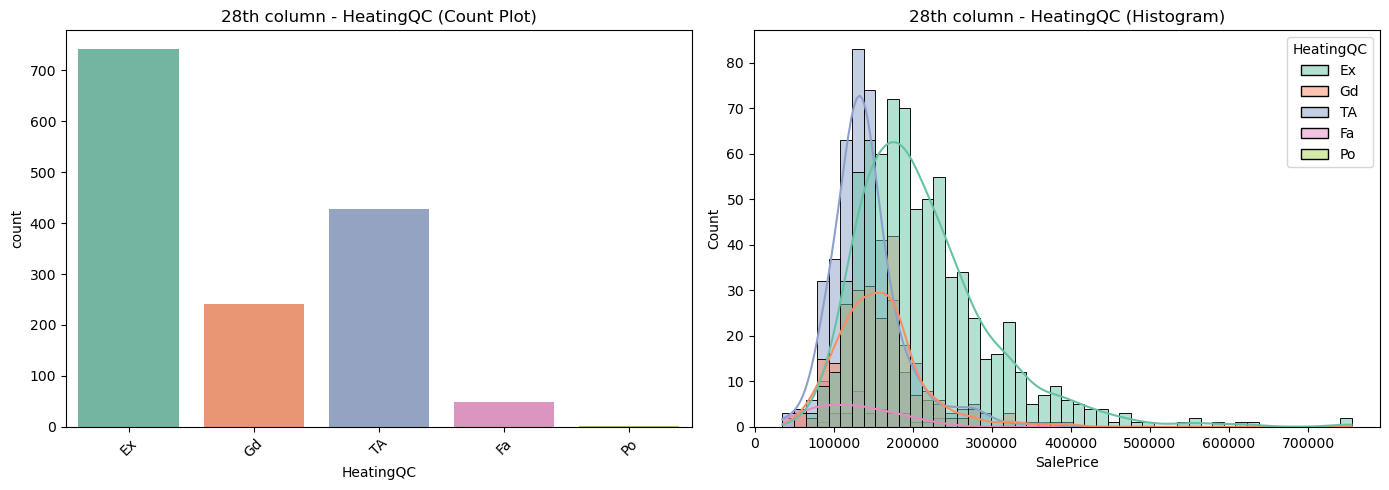

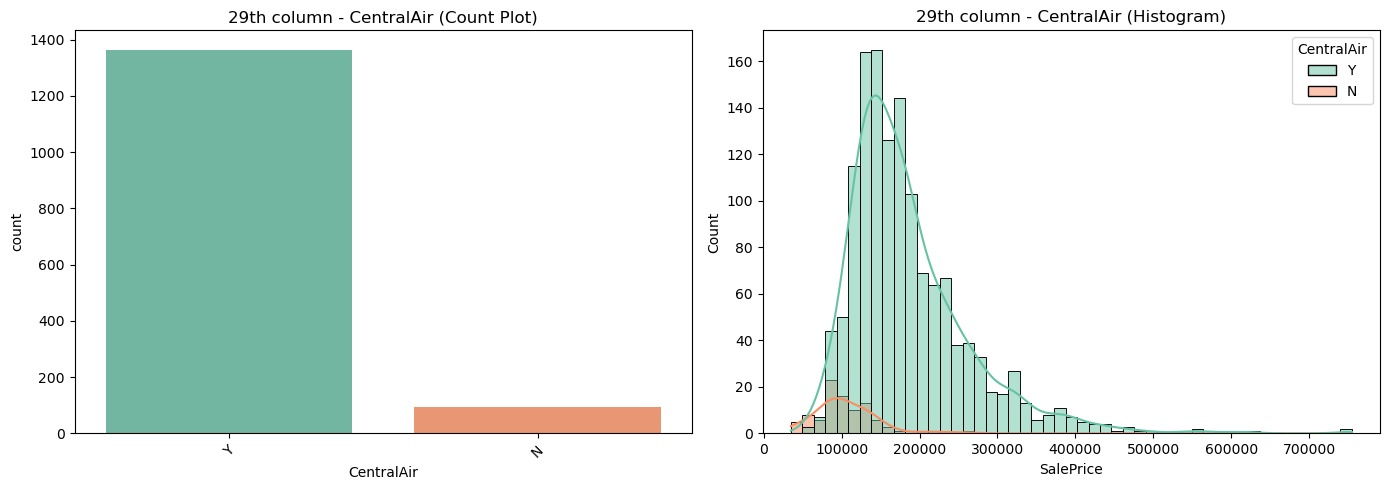

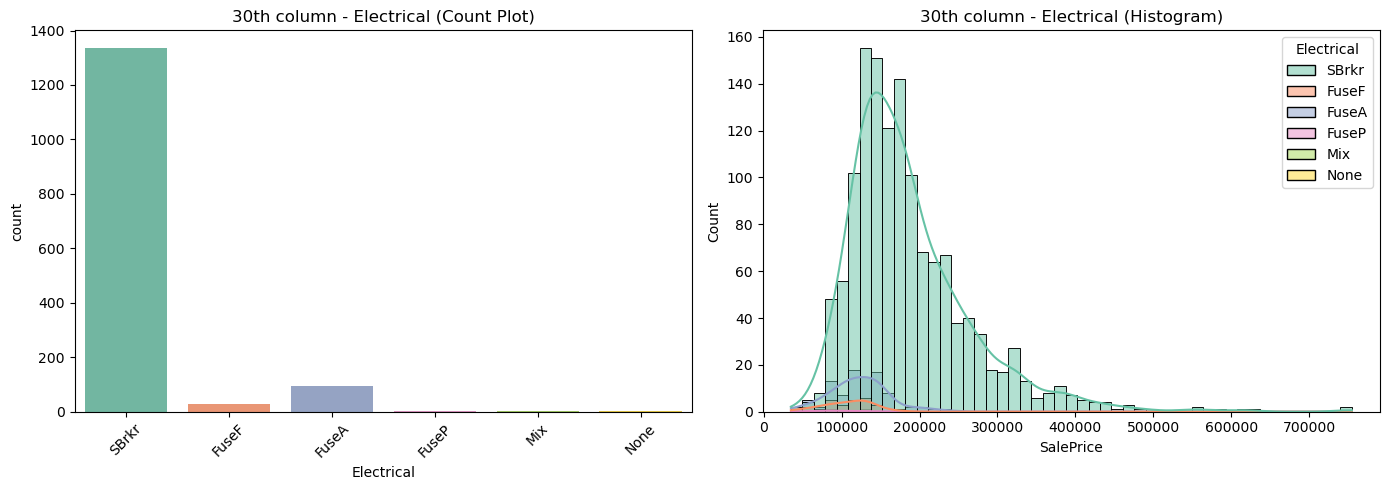

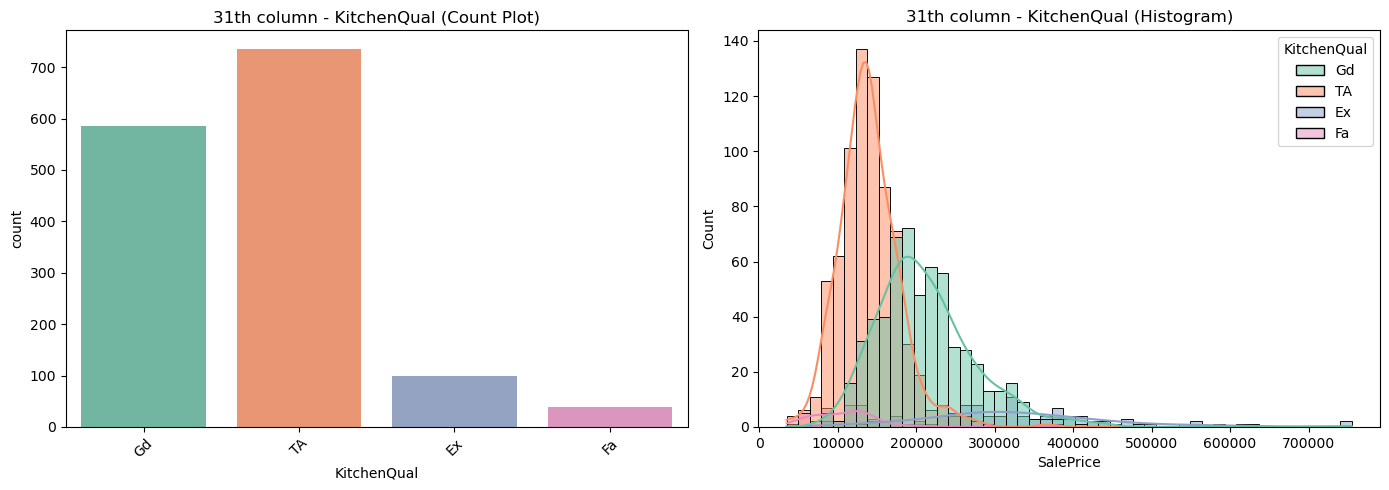

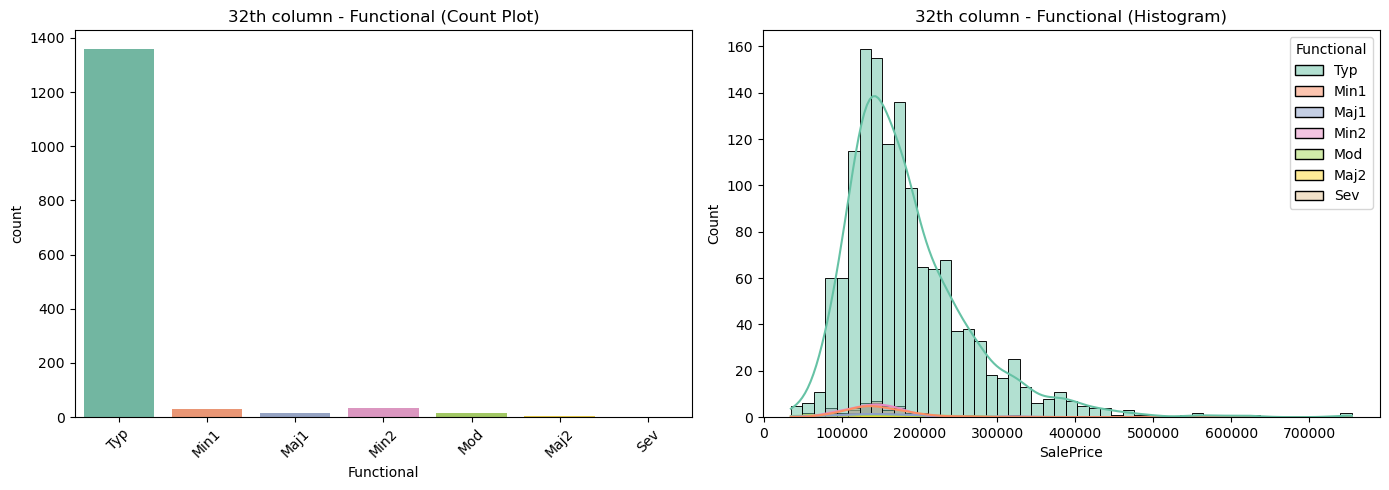

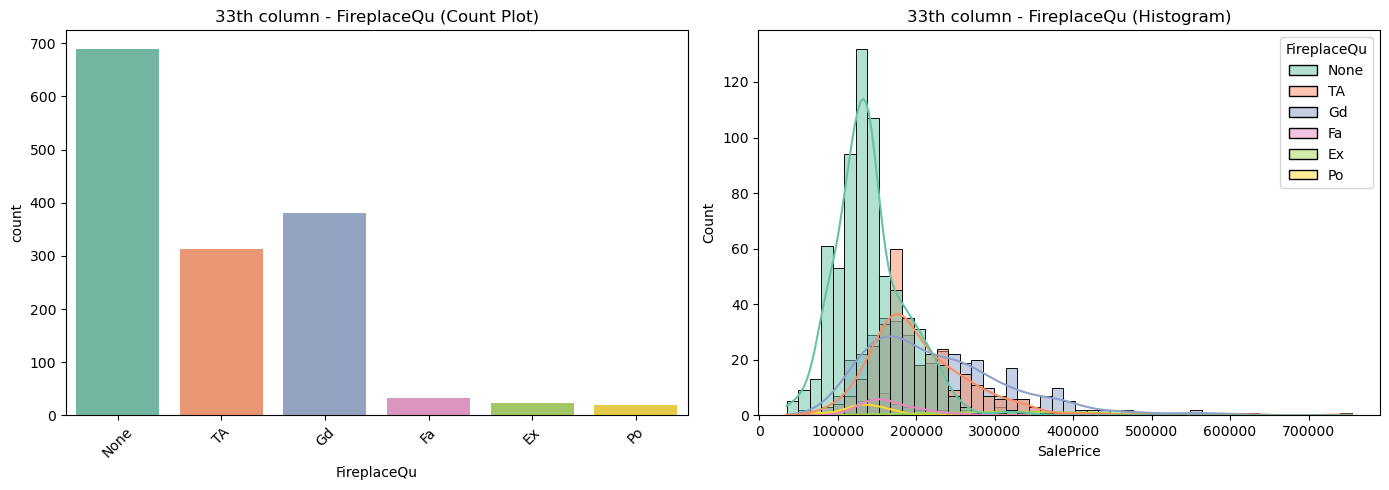

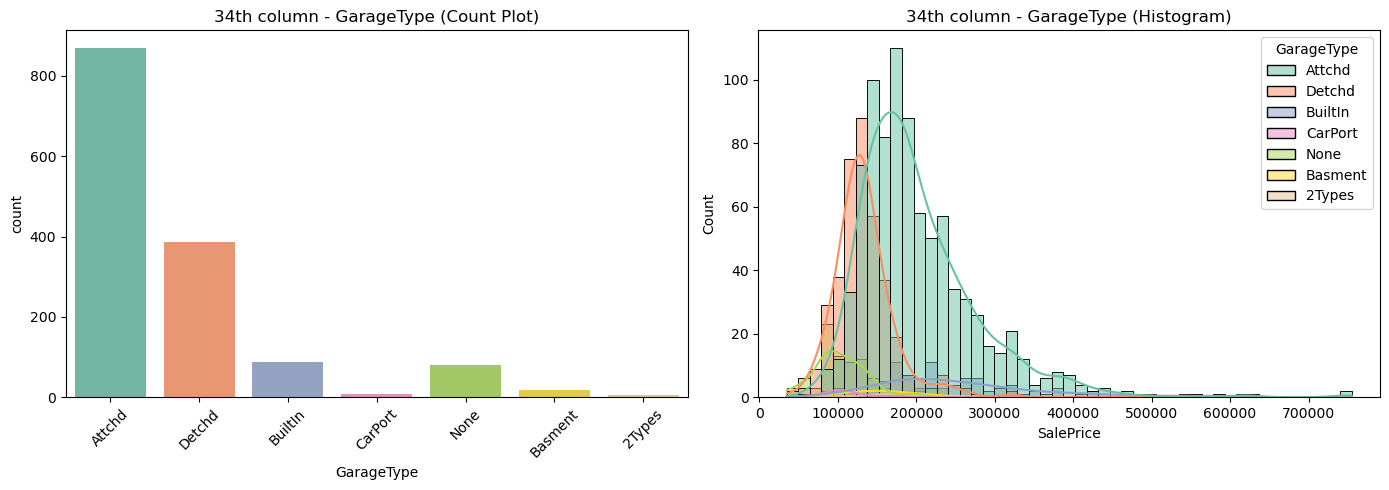

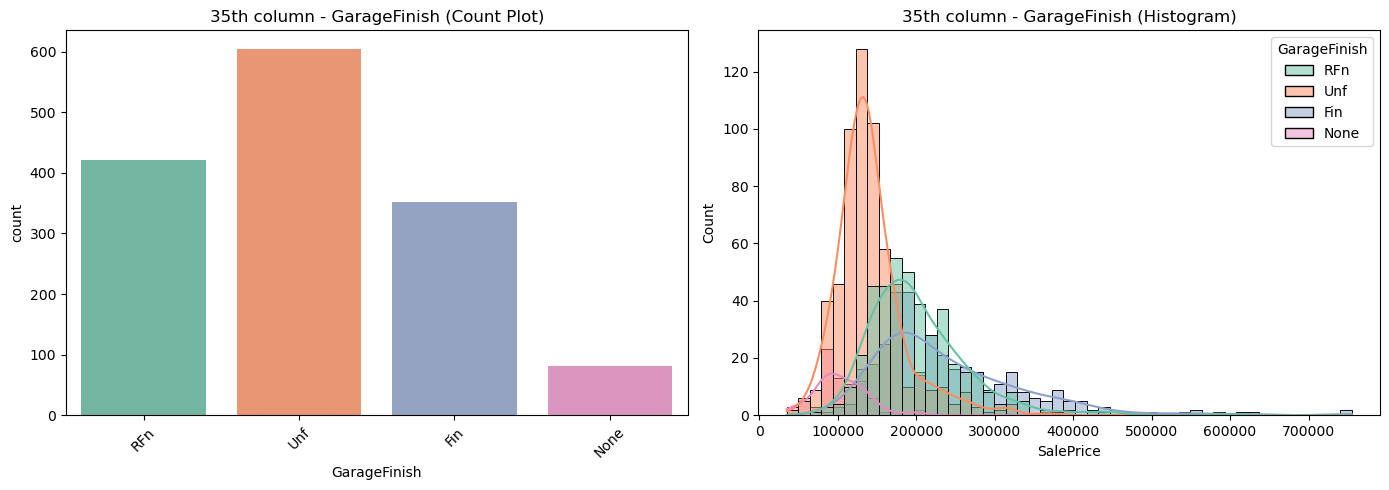

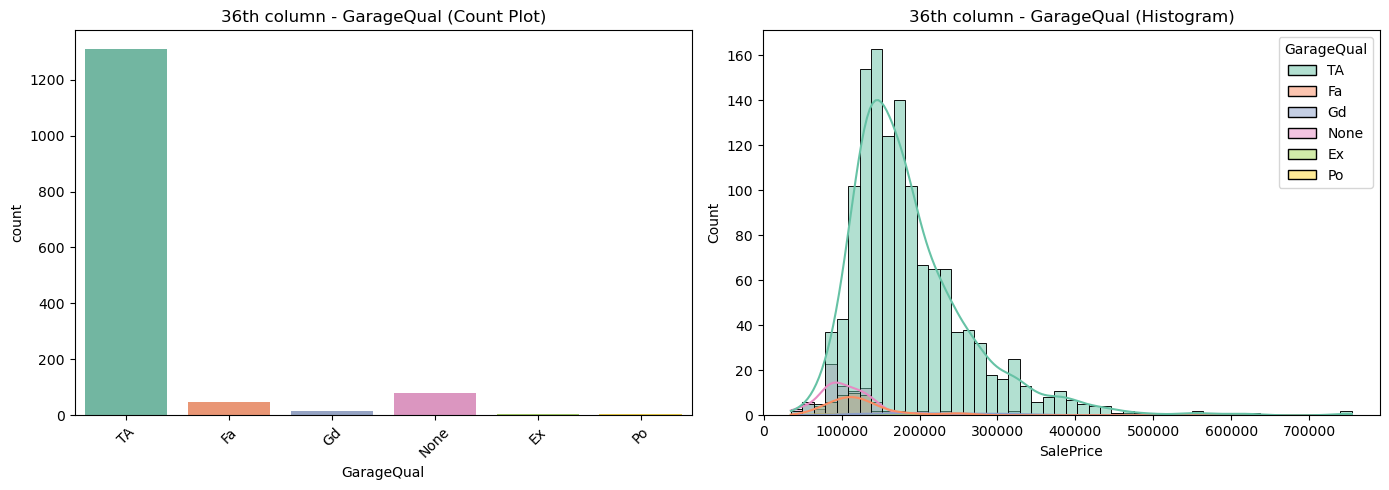

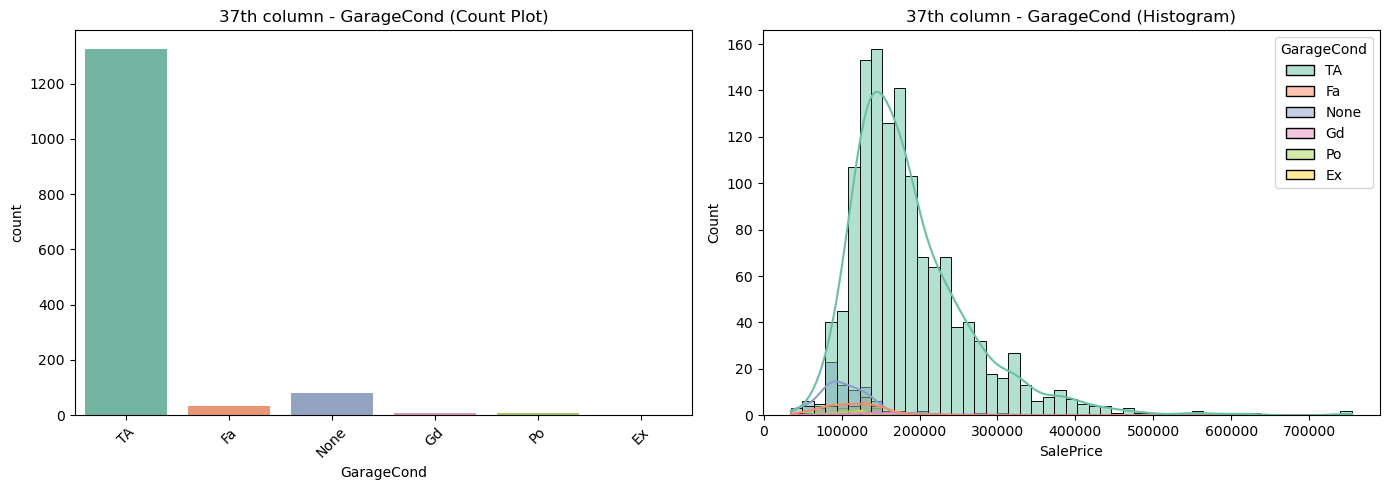

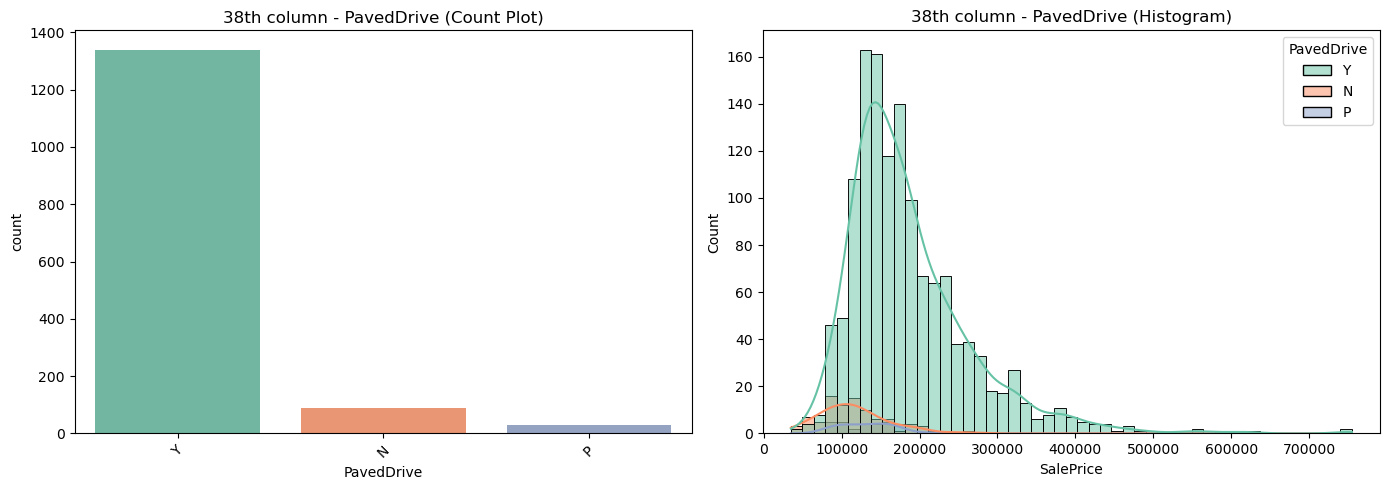

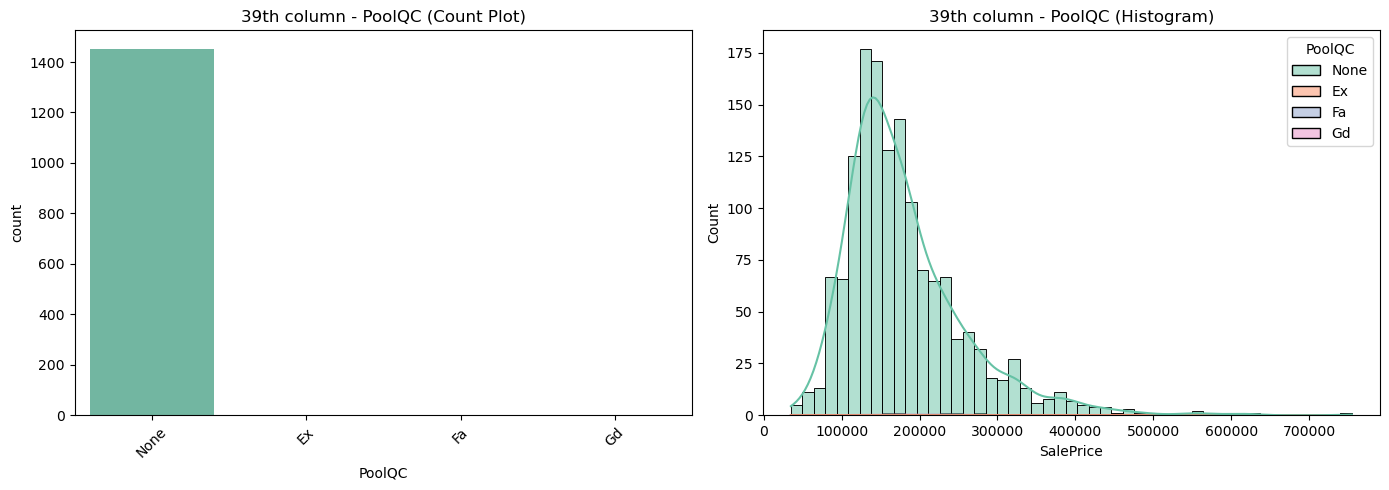

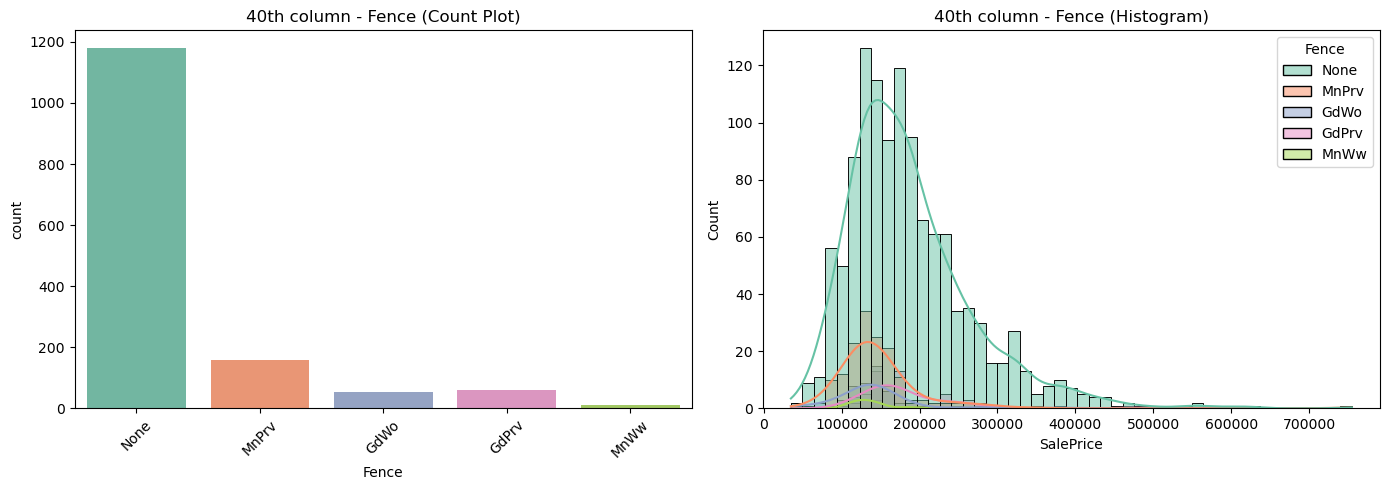

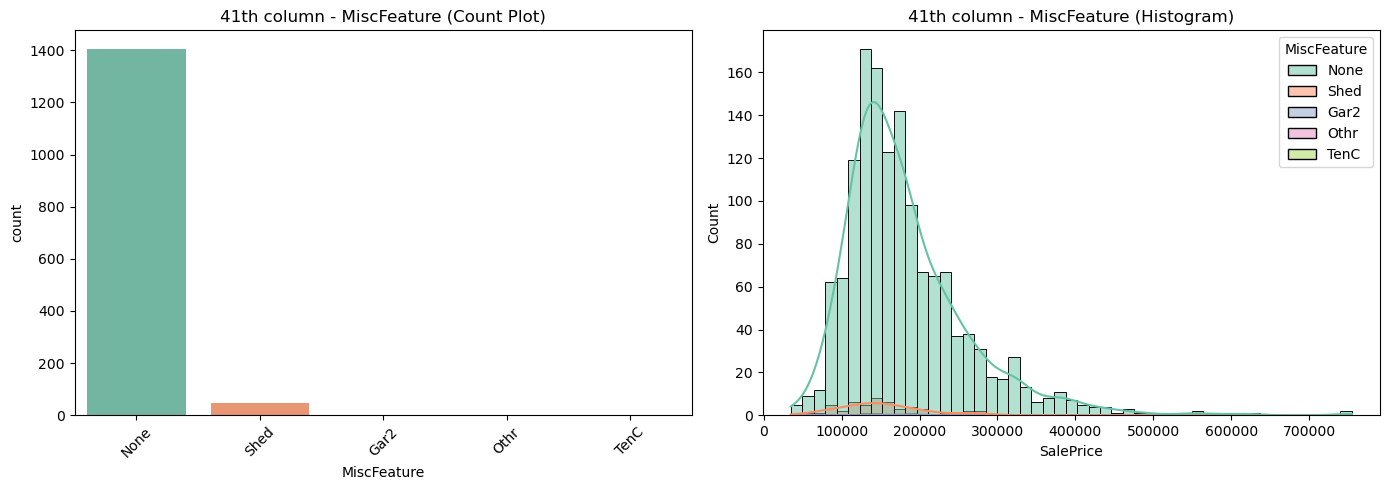

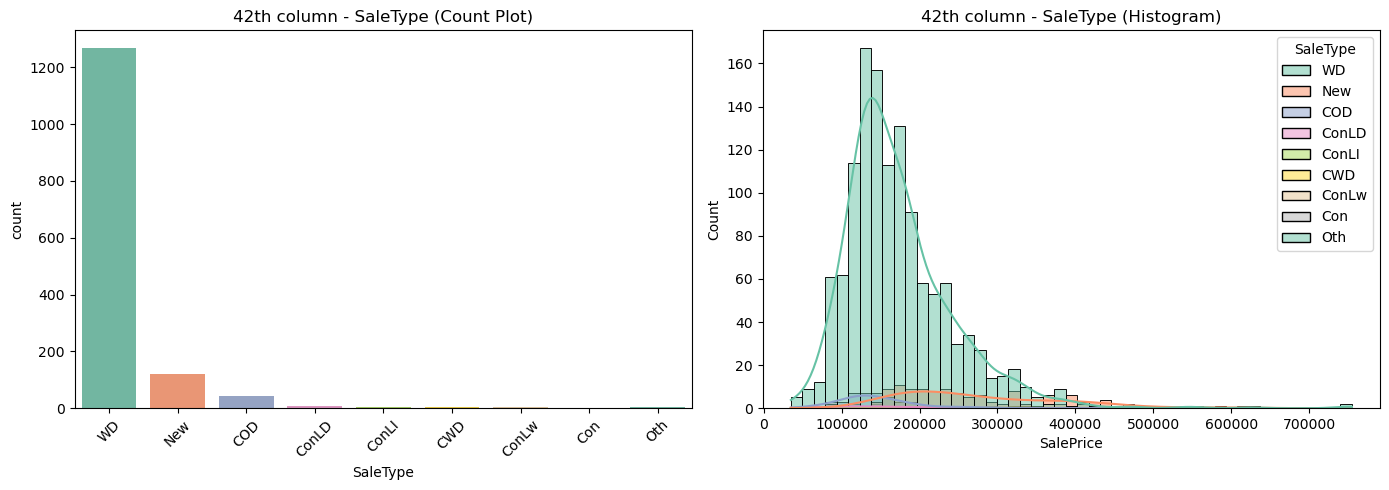

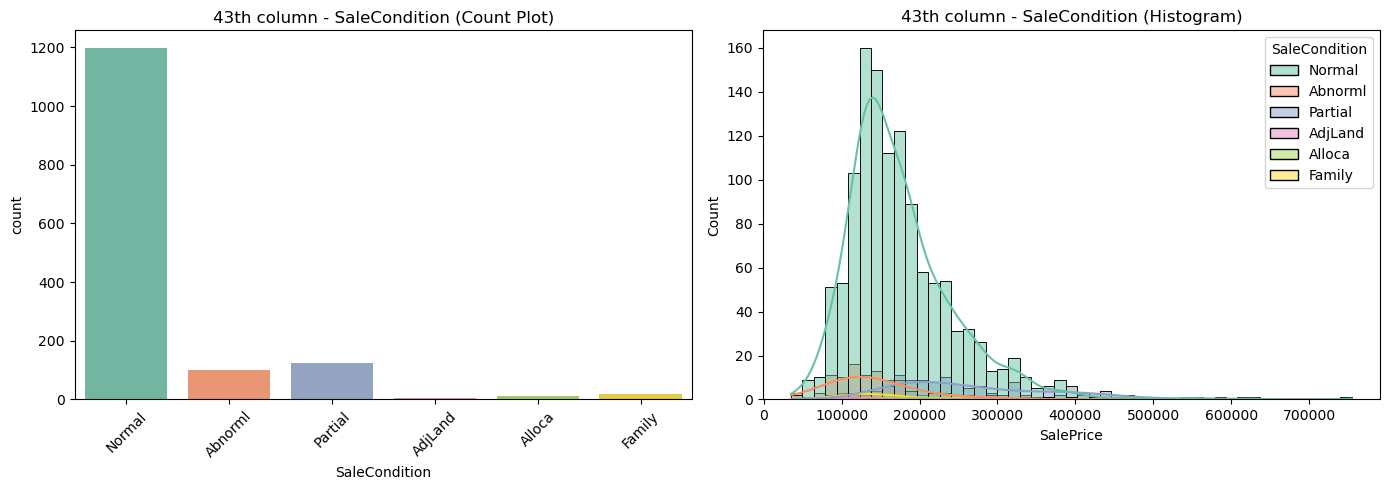

In [11]:
for i, col in enumerate(obj_cols):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    sns.countplot(x=data[col], palette='Set2', ax=axes[0])
    axes[0].set_title(f'{i+1}th column - {col} (Count Plot)')
    axes[0].tick_params(axis='x', rotation=45)
    
    sns.histplot(data=data, x='SalePrice', hue=data[col], kde=True, ax=axes[1], palette='Set2')
    axes[1].set_title(f'{i+1}th column - {col} (Histogram)')

    plt.tight_layout()
    plt.show()

## Plots to further divide numerical columns in 2 parts - discrete and continous

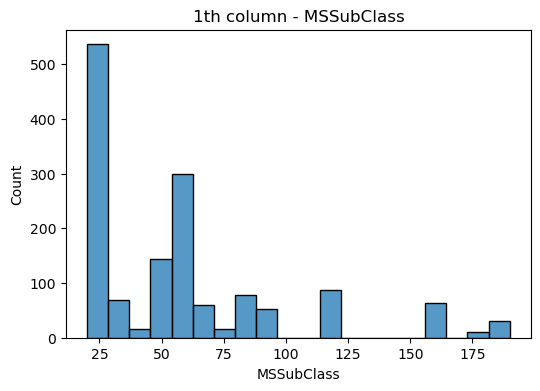

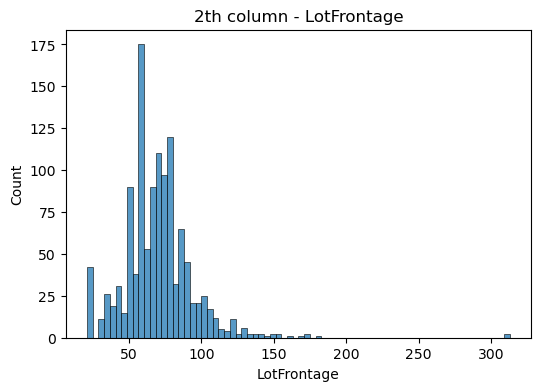

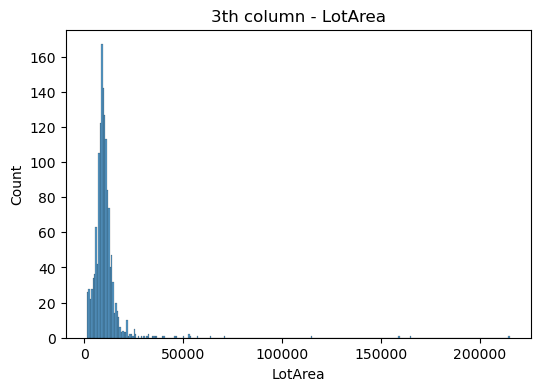

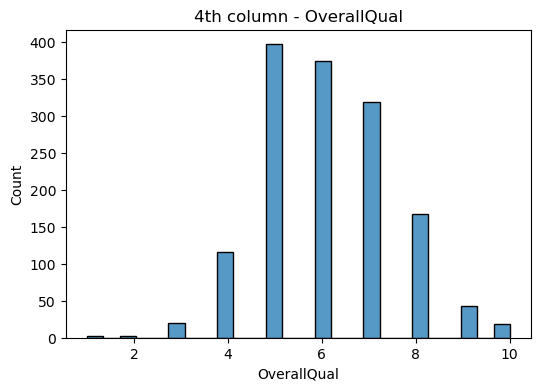

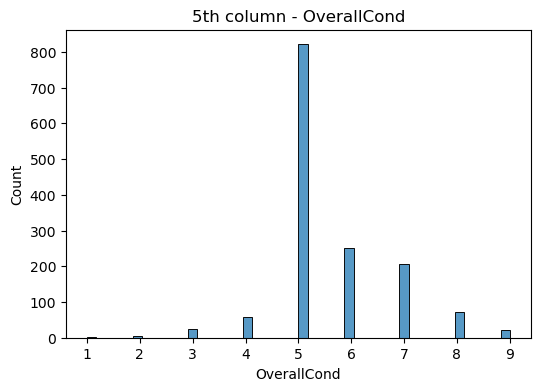

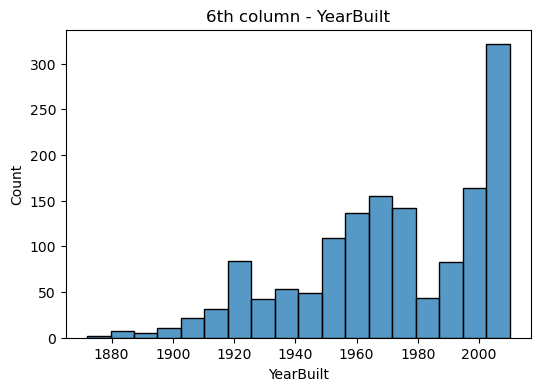

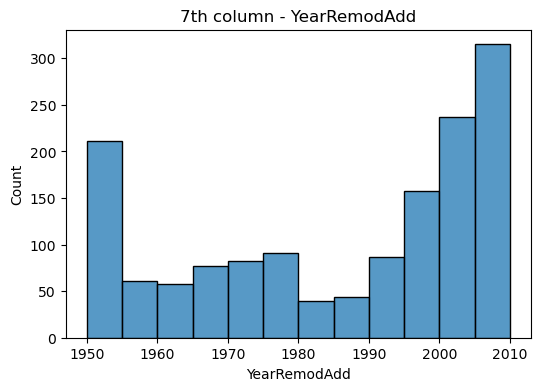

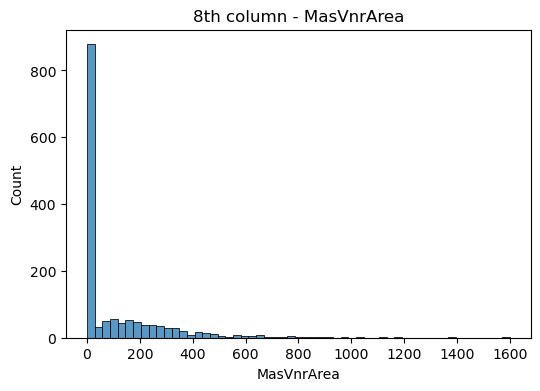

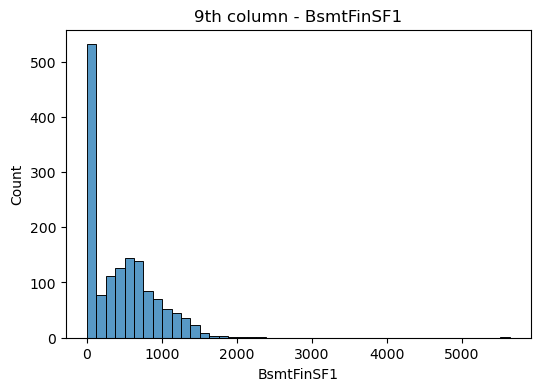

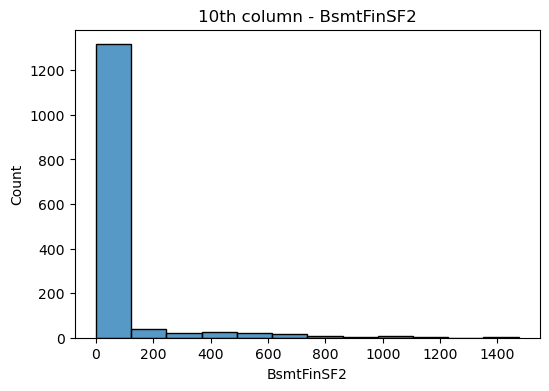

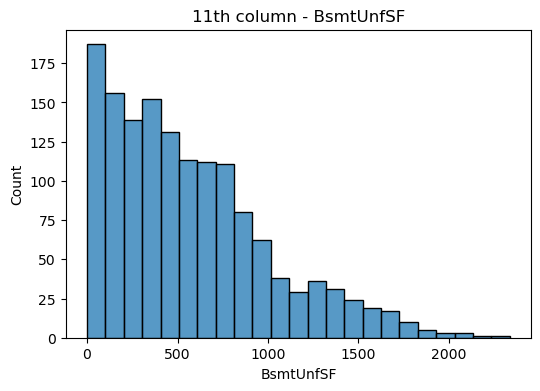

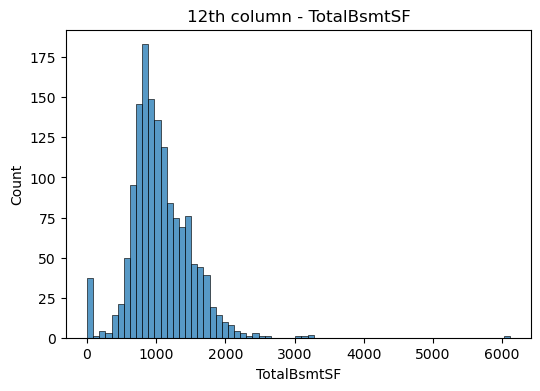

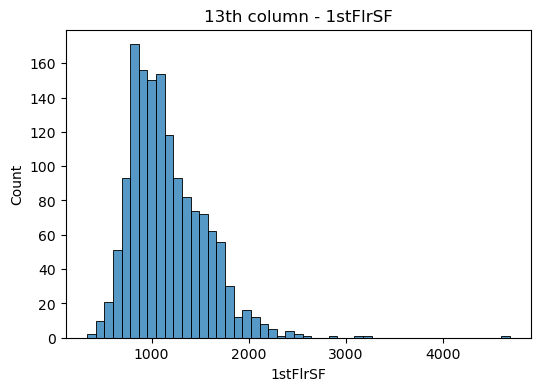

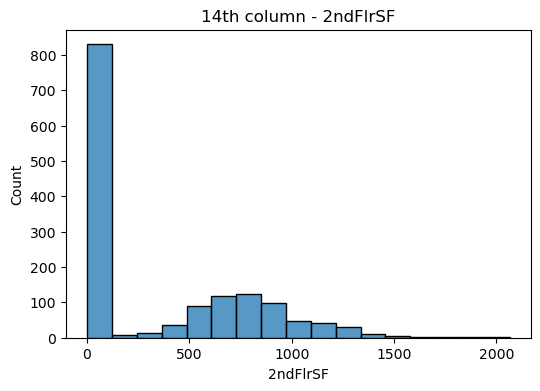

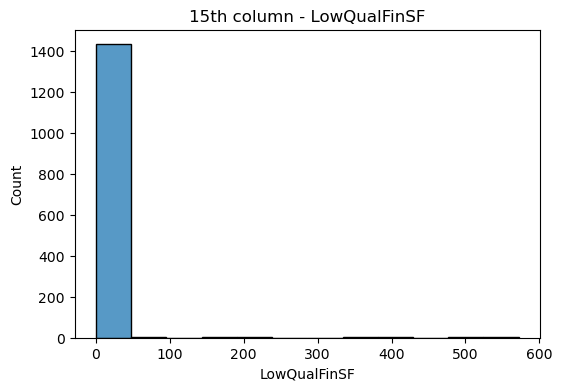

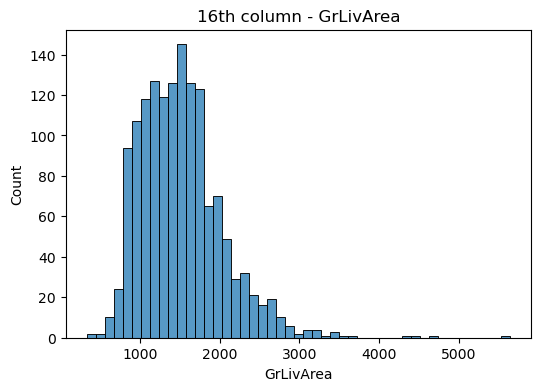

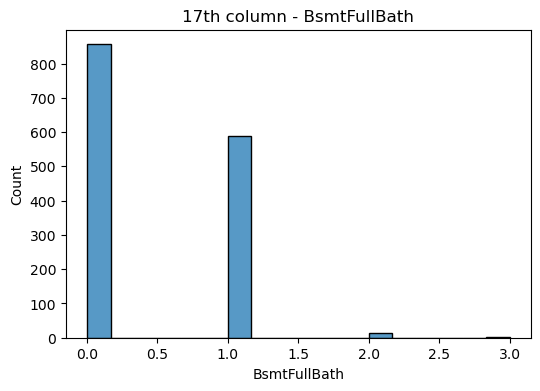

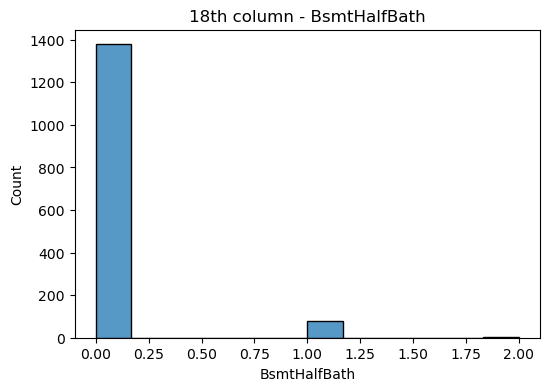

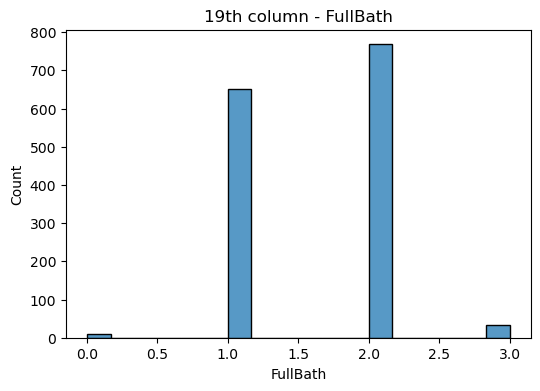

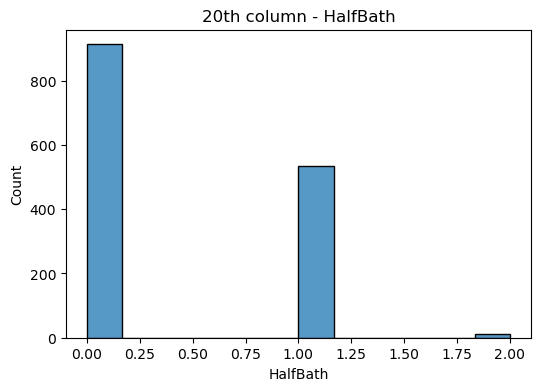

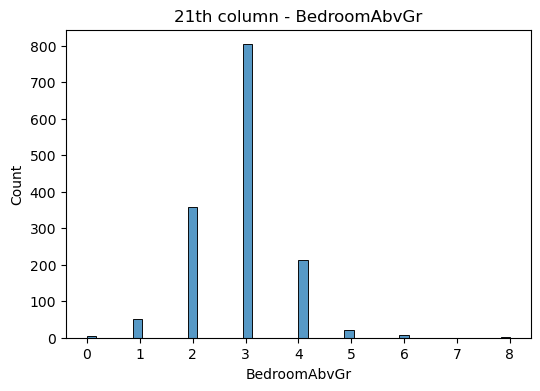

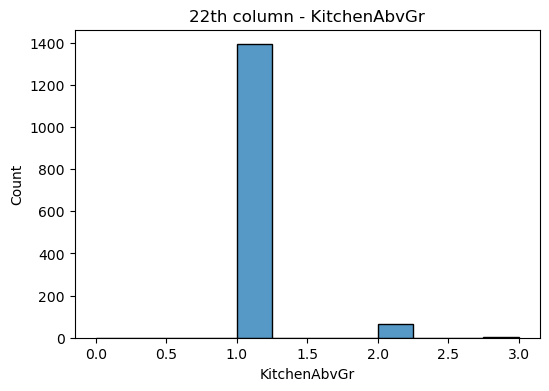

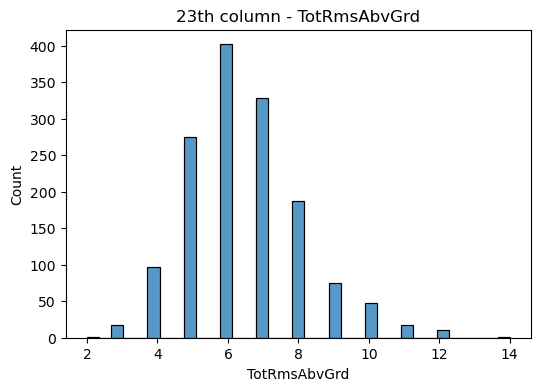

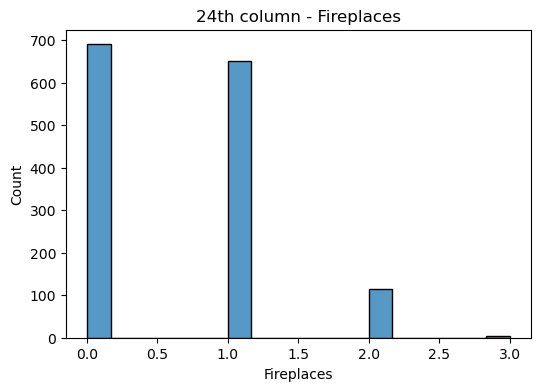

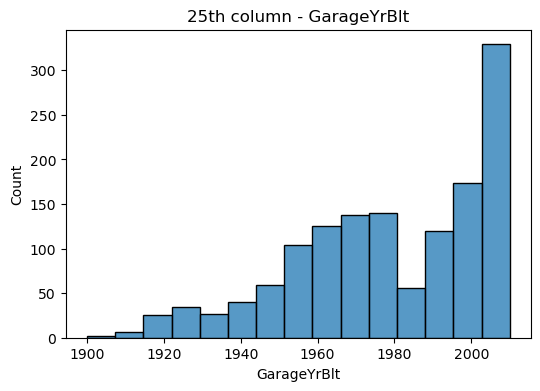

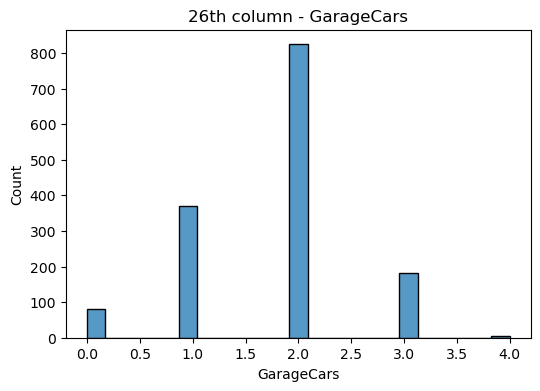

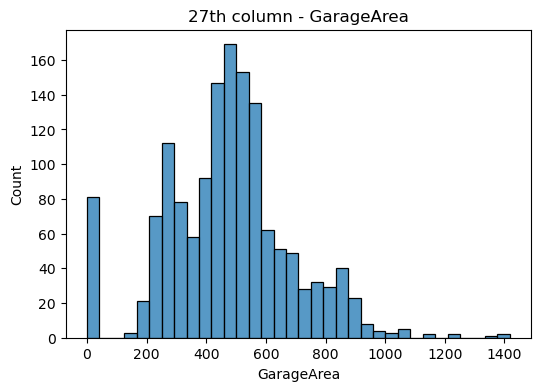

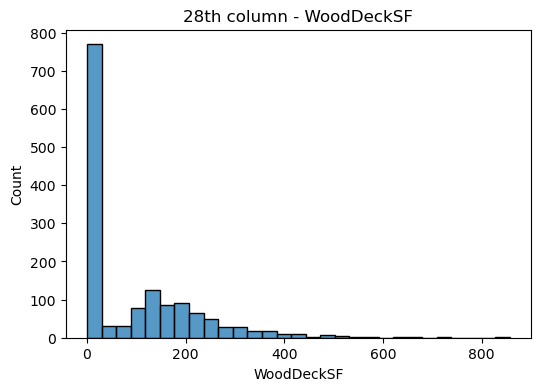

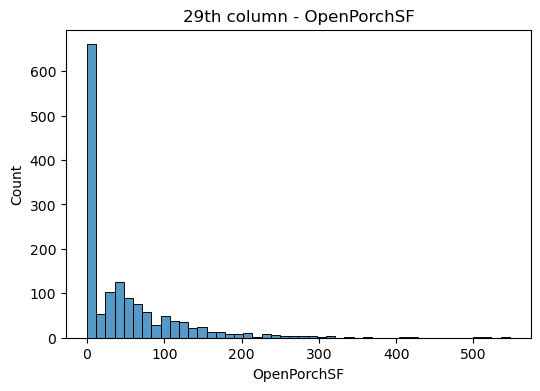

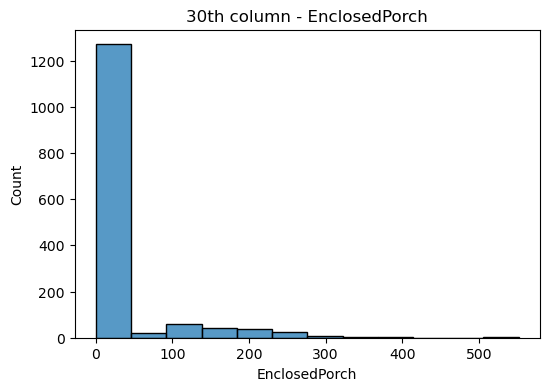

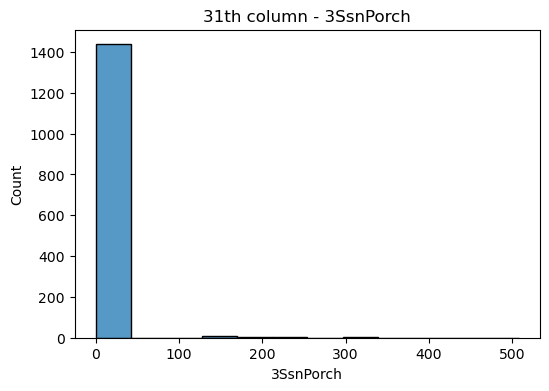

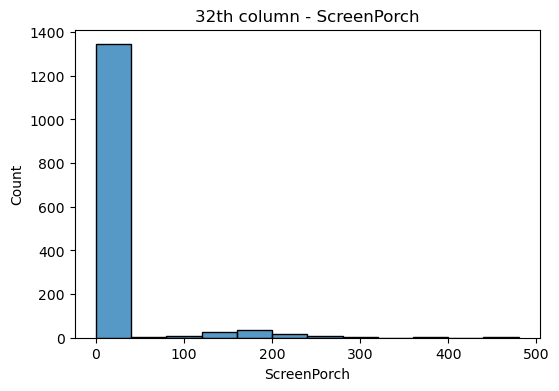

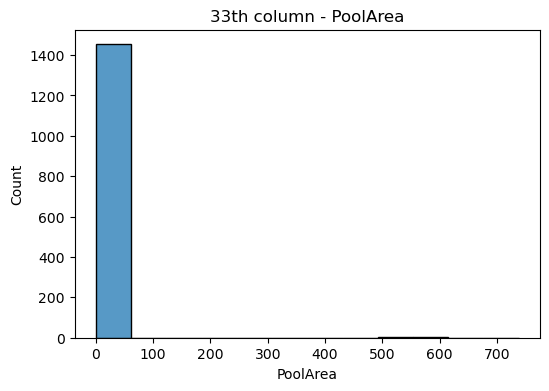

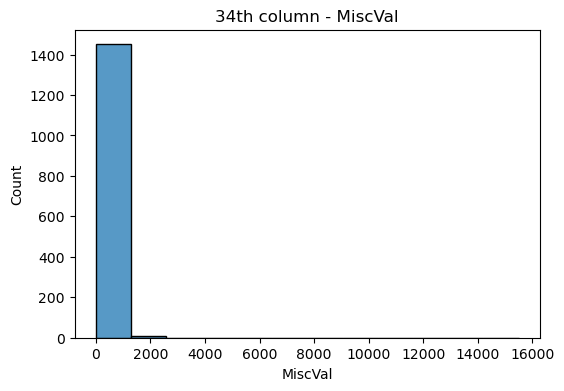

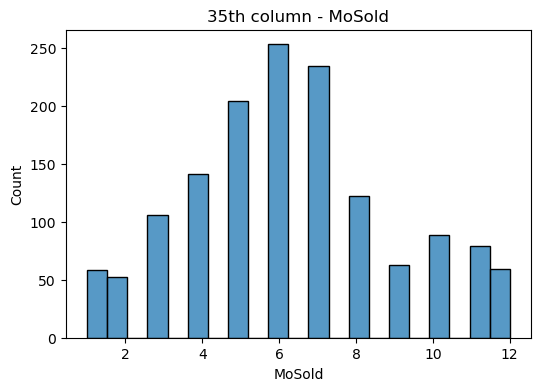

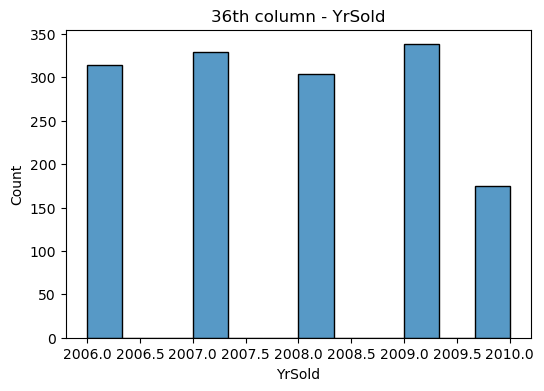

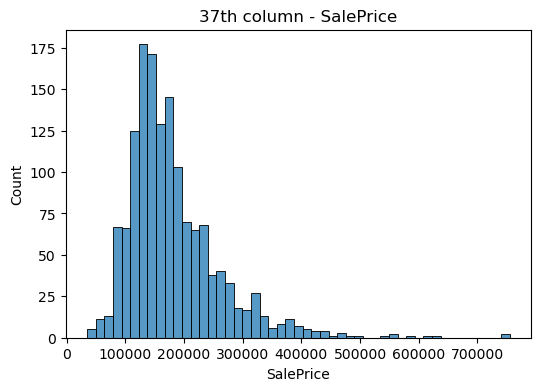

In [12]:
for i, col in enumerate(num_cols):
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col])
    plt.title(f'{i+1}th column - {col}')
    plt.show()

In [13]:
numerical_continous_cols = ['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                            '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF',
                            'OpenPorchSF', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']

# numerical_discrete_cols = [item for item in num_cols if item not in numerical_continous_cols]
numerical_discrete_cols = ['MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd',
                           'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd',
                           'Fireplaces','GarageYrBlt','GarageCars','EnclosedPorch','MoSold','YrSold']

In [14]:
len(numerical_continous_cols ) , len(numerical_discrete_cols), len(num_cols)

(19, 18, 37)

<Axes: >

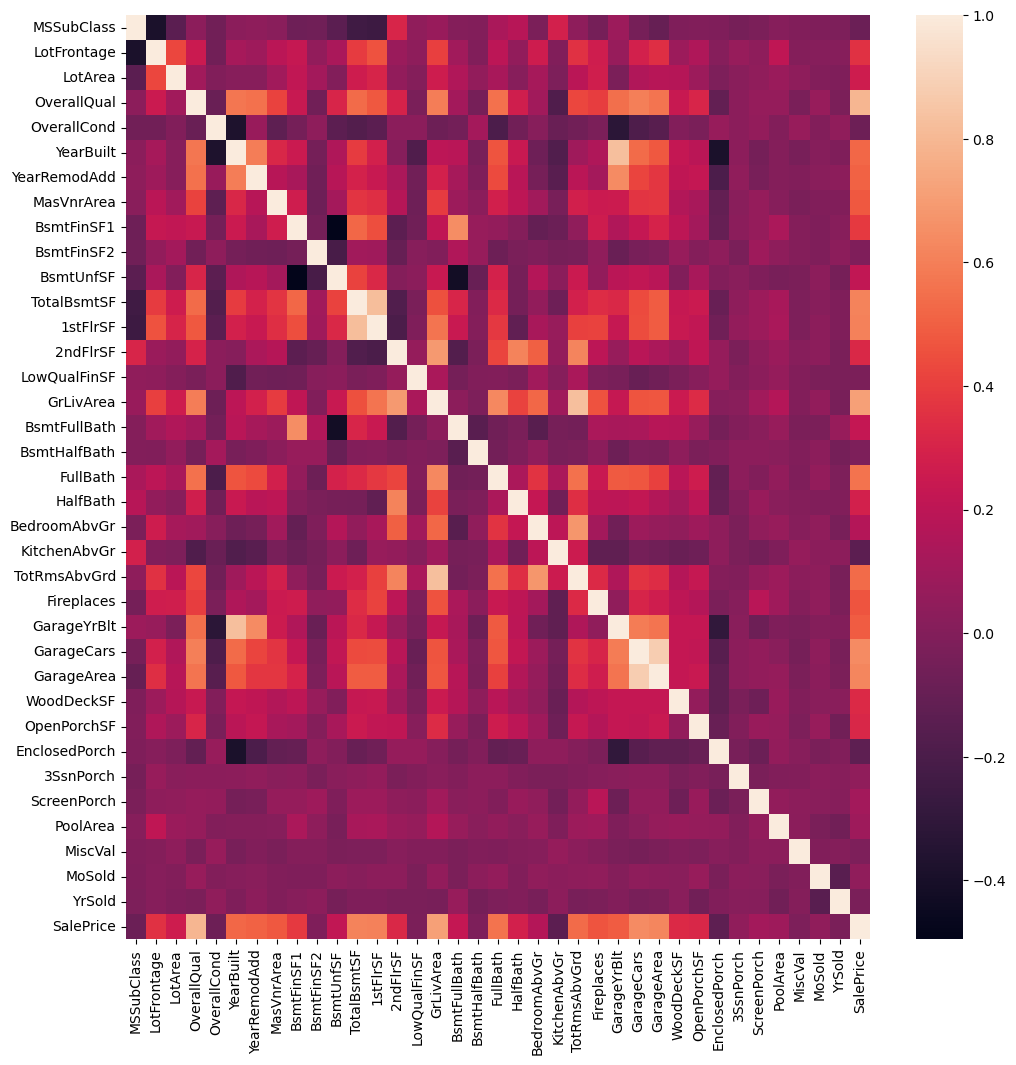

In [15]:
plt.figure(figsize=(12, 12))
sns.heatmap(data[num_cols].corr(), annot=False)

In [16]:
# numerical_continous_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
#                             '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF',
#                             'OpenPorchSF', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']

# numerical_discrete_cols = ['MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd',
#                            'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd',
#                            'Fireplaces','GarageYrBlt','GarageCars','EnclosedPorch','MoSold','YrSold']

# obj_cols = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
#             'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
#             'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
#             'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
#             'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
#             'SaleType', 'SaleCondition']